In [113]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("hip_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118217 entries, 0 to 118216
Data columns (total 79 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  118217 non-null  int64  
 1   Catalog     118217 non-null  object 
 2   HIP         118217 non-null  int64  
 3   Proxy       118217 non-null  object 
 4   RAhms       118217 non-null  object 
 5   DEdms       118217 non-null  object 
 6   Vmag        118217 non-null  object 
 7   VarFlag     118217 non-null  object 
 8   r_Vmag      118217 non-null  object 
 9   RAdeg       118217 non-null  object 
 10  DEdeg       118217 non-null  object 
 11  AstroRef    118217 non-null  object 
 12  Plx         118217 non-null  object 
 13  pmRA        118217 non-null  object 
 14  pmDE        118217 non-null  object 
 15  e_RAdeg     118217 non-null  object 
 16  e_DEdeg     118217 non-null  object 
 17  e_Plx       118217 non-null  object 
 18  e_pmRA      118217 non-null  object 
 19  e_

In [20]:
df["r_SpType"]=df["r_SpType"].str.rstrip()
df["Qual"]=df["Qual"].str.rstrip()

In [21]:
df = df[(df['r_SpType'] !='') & (df['r_SpType'] != 'X')]
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [22]:
df = df[(df['Qual'] !='D') & (df['Qual'] != 'S')]
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [332]:
df2=df.drop_duplicates()

In [333]:
df2.drop(['Catalog', 'HIP', 'Proxy', 'RAhms', 'DEdms', 'VarFlag', 'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef','pmRA', 'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA', 'Plx:DE', 
           'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', 'HIP', 
           'BTmag', 'e_BTmag', 'VTmag', 'e_VTmag', 'm_BTmag', 'r_B-V','r_V-I', 
           'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin', 'Period', 'HvarType', 
           'moreVar', 'morePhoto', 'CCDM', 'n_CCDM', 'Nsys', 'Ncomp', 'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 
           'rho', 'e_rho', 'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD', 'CPD','r_SpType'],inplace=True ,axis=1)

In [334]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94648 entries, 0 to 94647
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  94648 non-null  int64  
 1   Vmag        94648 non-null  object 
 2   Plx         94648 non-null  object 
 3   e_Plx       94648 non-null  object 
 4   HIP.1       94648 non-null  int64  
 5   B-V         94648 non-null  object 
 6   e_B-V       94648 non-null  object 
 7   V-I         94648 non-null  object 
 8   e_V-I       94648 non-null  object 
 9   (V-I)red    94648 non-null  float64
 10  SpType      94648 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.7+ MB


In [335]:
df2.drop(['HIP.1','Unnamed: 0'],inplace=True,axis=1)


In [336]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94648 entries, 0 to 94647
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Vmag      94648 non-null  object 
 1   Plx       94648 non-null  object 
 2   e_Plx     94648 non-null  object 
 3   B-V       94648 non-null  object 
 4   e_B-V     94648 non-null  object 
 5   V-I       94648 non-null  object 
 6   e_V-I     94648 non-null  object 
 7   (V-I)red  94648 non-null  float64
 8   SpType    94648 non-null  object 
dtypes: float64(1), object(8)
memory usage: 7.2+ MB


In [337]:
lit=["Plx","e_Plx","B-V","e_B-V","V-I","e_V-I","SpType"]
for i in lit:
    df2[i]=df2[i].str.rstrip()
    

In [338]:
b=[]
a=0
lis=["Plx","e_Plx","B-V","e_B-V","V-I","e_V-I","Vmag"]
for i in range(94181):
    for x in lis:
        if df2[x].loc[df2.index[i]] == "":
            b.append(i)
            df2.drop(index=df2.index[i],inplace=True)        


In [339]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94181 entries, 0 to 94647
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Vmag      94181 non-null  object 
 1   Plx       94181 non-null  object 
 2   e_Plx     94181 non-null  object 
 3   B-V       94181 non-null  object 
 4   e_B-V     94181 non-null  object 
 5   V-I       94181 non-null  object 
 6   e_V-I     94181 non-null  object 
 7   (V-I)red  94181 non-null  float64
 8   SpType    94181 non-null  object 
dtypes: float64(1), object(8)
memory usage: 9.2+ MB


In [340]:
 df2['Plx'] = pd.to_numeric(df2['Plx'])

In [341]:
df2['B-V'] = pd.to_numeric(df2['B-V'])

In [342]:
df2['e_B-V'] = pd.to_numeric(df2['e_B-V'])

In [343]:
df2['e_Plx'] = pd.to_numeric(df2['e_Plx'])

In [344]:
df2['Vmag'] = pd.to_numeric(df2['Vmag'])

In [345]:
df2['V-I'] = pd.to_numeric(df2['V-I'])

In [346]:
df2['e_V-I'] = pd.to_numeric(df2['e_V-I'])

In [347]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94181 entries, 0 to 94647
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Vmag      94181 non-null  float64
 1   Plx       94181 non-null  float64
 2   e_Plx     94181 non-null  float64
 3   B-V       94181 non-null  float64
 4   e_B-V     94181 non-null  float64
 5   V-I       94181 non-null  float64
 6   e_V-I     94181 non-null  float64
 7   (V-I)red  94181 non-null  float64
 8   SpType    94181 non-null  object 
dtypes: float64(8), object(1)
memory usage: 9.2+ MB


In [348]:
df2=df2[df2["e_Plx"]<2]
df2=df2[df2["e_B-V"]<2]
df2=df2[df2["e_V-I"]<2]
df2

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType
1,6.61,2.81,0.63,-0.019,0.004,0.00,0.00,0.00,B9
2,8.06,7.75,0.97,0.370,0.009,0.43,0.01,0.43,F0V
3,8.55,2.87,1.11,0.902,0.013,0.90,0.01,0.95,G8III
5,9.64,17.74,1.30,0.740,0.020,0.79,0.02,0.79,G0
6,8.59,4.81,0.99,1.067,0.023,1.03,0.02,1.00,G5
...,...,...,...,...,...,...,...,...,...
94643,10.01,3.42,1.55,0.549,0.037,0.62,0.03,0.65,F8
94644,6.99,1.92,0.91,1.595,0.013,1.61,0.01,1.56,K2
94645,8.23,10.63,1.17,0.639,0.015,0.70,0.01,0.70,G2V
94646,7.59,5.00,1.01,0.999,0.012,0.98,0.01,0.98,K0


In [349]:
df2['Amag']=df2['Vmag'] + 5*(np.log10(df2['Plx'])-2)

C:\Users\RAKESH\anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RAKESH\anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [350]:
df2.dropna()

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag
1,6.61,2.81,0.63,-0.019,0.004,0.00,0.00,0.00,B9,-1.146468
2,8.06,7.75,0.97,0.370,0.009,0.43,0.01,0.43,F0V,2.506509
3,8.55,2.87,1.11,0.902,0.013,0.90,0.01,0.95,G8III,0.839409
5,9.64,17.74,1.30,0.740,0.020,0.79,0.02,0.79,G0,5.884768
6,8.59,4.81,0.99,1.067,0.023,1.03,0.02,1.00,G5,2.000725
...,...,...,...,...,...,...,...,...,...,...
94643,10.01,3.42,1.55,0.549,0.037,0.62,0.03,0.65,F8,2.680131
94644,6.99,1.92,0.91,1.595,0.013,1.61,0.01,1.56,K2,-1.593494
94645,8.23,10.63,1.17,0.639,0.015,0.70,0.01,0.70,G2V,3.362666
94646,7.59,5.00,1.01,0.999,0.012,0.98,0.01,0.98,K0,1.084850


# HR diagram 

In [351]:
B_V = np.array(df2["B-V"], dtype=float)
B_V2 = B_V.tolist()
A_mag = np.array(df2["Amag"], dtype=float)
A_mag2 = A_mag.tolist()

In [352]:
import matplotlib.pyplot as plt

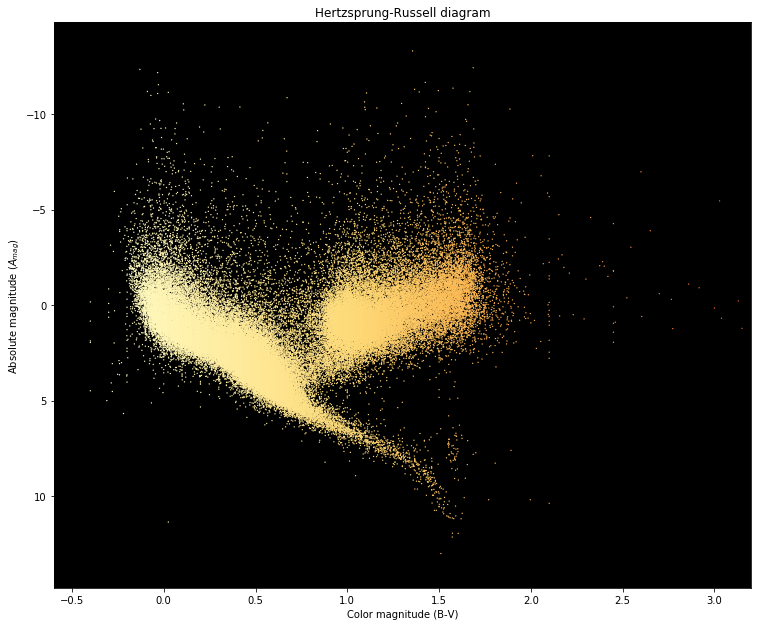

In [353]:
fig, ax = plt.subplots(figsize=(12.5,10.4))
ax.scatter(B_V, A_mag, c=B_V,  cmap = "YlOrRd", marker = '.', s = 7, linewidth = 0.01)
plt.xlabel("Color magnitude (B-V)")
plt.ylabel("Absolute magnitude ($A_{mag}$)")
plt.title("Hertzsprung-Russell diagram")
plt.xlim(-0.6, 3.2)
plt.ylim(14.8, -14.8) 
Color_BC = plt.gca()
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1)

In [354]:
df2['Temp']=4600*(1/(0.92*df2["B-V"] + 1.7) + 1/(0.92*df2["B-V"] + 0.62) )

In [355]:
df2.dropna()

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
1,6.61,2.81,0.63,-0.019,0.004,0.00,0.00,0.00,B9,-1.146468,10368.595588
2,8.06,7.75,0.97,0.370,0.009,0.43,0.01,0.43,F0V,2.506509,7044.130880
3,8.55,2.87,1.11,0.902,0.013,0.90,0.01,0.95,G8III,0.839409,4991.060700
5,9.64,17.74,1.30,0.740,0.020,0.79,0.02,0.79,G0,5.884768,5468.409019
6,8.59,4.81,0.99,1.067,0.023,1.03,0.02,1.00,G5,2.000725,4587.424350
...,...,...,...,...,...,...,...,...,...,...,...
94643,10.01,3.42,1.55,0.549,0.037,0.62,0.03,0.65,F8,2.680131,6174.690259
94644,6.99,1.92,0.91,1.595,0.013,1.61,0.01,1.56,K2,-1.593494,3655.993639
94645,8.23,10.63,1.17,0.639,0.015,0.70,0.01,0.70,G2V,3.362666,5818.920292
94646,7.59,5.00,1.01,0.999,0.012,0.98,0.01,0.98,K0,1.084850,4745.140425


# Classification of A group

In [606]:
A_cls=df4[df4['SpType'].str.contains('A', regex=False)]
A_cls

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
13,8.56,3.95,0.77,0.196,0.023,0.21,0.03,0.22,A4V,1.542985,8194.093023
20,8.41,3.53,1.12,0.022,0.009,0.04,0.01,0.04,A0V,1.148874,9858.851180
30,7.46,4.73,0.67,0.160,0.008,0.18,0.01,0.14,A2IV,0.834306,8486.084510
39,8.96,4.39,1.29,0.306,0.002,0.35,0.00,0.35,A9V,2.172323,7423.943766
43,8.98,2.92,1.26,0.107,0.002,0.12,0.00,0.12,A3V,1.306914,8960.533830
...,...,...,...,...,...,...,...,...,...,...,...
28845,7.35,3.31,0.81,0.330,0.001,0.38,0.00,0.38,A7IV,-0.050860,7276.378482
28855,7.07,6.86,0.67,0.279,0.007,0.32,0.01,0.32,A9V,1.251621,7597.989433
28876,8.21,5.60,0.80,-0.001,0.010,0.02,0.01,0.01,A0V,1.950940,10137.728070
28883,5.00,20.53,0.51,0.060,0.003,0.07,0.00,0.06,A1V,1.561945,9433.580165


In [583]:
A_cls.describe()

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,Amag,Temp
count,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.00000,3505.000000,3505.000000,3505.000000
mean,7.849372,5.757013,0.965392,0.171022,0.018586,0.194910,0.01475,0.179700,1.175968,8545.596677
std,1.096043,4.797250,0.281551,0.138953,0.052136,0.149912,0.01082,0.156822,1.272546,1048.106025
min,1.170000,0.060000,0.450000,-0.269000,0.000000,-0.220000,0.00000,-0.220000,-8.064850,3778.527101
25%,7.200000,3.350000,0.760000,0.068000,0.007000,0.080000,0.01000,0.060000,0.638769,7795.184395
50%,7.960000,4.970000,0.920000,0.156000,0.012000,0.170000,0.01000,0.150000,1.346430,8519.954101
75%,8.620000,7.040000,1.120000,0.250000,0.017000,0.280000,0.02000,0.260000,1.990781,9349.174503
max,10.780000,130.080000,1.990000,1.510000,0.495000,1.460000,0.11000,1.630000,6.109023,15515.240213


In [497]:
A_cls=A_cls[A_cls["Temp"]<11000]
A_cls=A_cls[A_cls["Temp"]>7000]#prescribed temperature range 

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,Amag,Temp
count,13806.000000,13806.000000,13806.000000,13806.000000,13806.000000,13806.000000,13806.000000,13806.000000,1.361200e+04,13806.000000
mean,8.110168,4.922913,1.019966,0.163922,0.019040,0.188041,0.016843,0.170547,-inf,8561.715478
std,0.937428,4.769394,0.281967,0.107294,0.043731,0.118828,0.012812,0.126705,NaN,932.489377
min,-1.440000,-3.100000,0.400000,-0.063000,0.000000,-0.230000,0.000000,-0.520000,-inf,7005.134245
25%,7.550000,2.880000,0.820000,0.077000,0.009000,0.090000,0.010000,0.060000,5.754369e-01,7788.197692
50%,8.160000,4.400000,0.990000,0.166000,0.014000,0.180000,0.010000,0.150000,1.344373e+00,8435.833251
75%,8.740000,6.300000,1.180000,0.251000,0.018000,0.280000,0.020000,0.260000,1.983749e+00,9256.197872
max,11.780000,379.210000,1.990000,0.377000,0.495000,0.680000,0.210000,1.570000,1.135718e+01,10985.864245


In [607]:
A_cls.replace([np.inf, -np.inf], np.nan, inplace=True)
A_cls=A_cls.dropna()

C:\Users\RAKESH\anaconda\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [608]:
A_cls.describe()

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,Amag,Temp
count,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.00000,3505.000000,3505.000000,3505.000000
mean,7.849372,5.757013,0.965392,0.171022,0.018586,0.194910,0.01475,0.179700,1.175968,8545.596677
std,1.096043,4.797250,0.281551,0.138953,0.052136,0.149912,0.01082,0.156822,1.272546,1048.106025
min,1.170000,0.060000,0.450000,-0.269000,0.000000,-0.220000,0.00000,-0.220000,-8.064850,3778.527101
25%,7.200000,3.350000,0.760000,0.068000,0.007000,0.080000,0.01000,0.060000,0.638769,7795.184395
50%,7.960000,4.970000,0.920000,0.156000,0.012000,0.170000,0.01000,0.150000,1.346430,8519.954101
75%,8.620000,7.040000,1.120000,0.250000,0.017000,0.280000,0.02000,0.260000,1.990781,9349.174503
max,10.780000,130.080000,1.990000,1.510000,0.495000,1.460000,0.11000,1.630000,6.109023,15515.240213


In [609]:
Q1 = A_cls['Amag'].quantile(0.25)
Q3 = A_cls['Amag'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where IQR > 1.5
A_cls = A_cls[(A_cls['Amag'] - Q1) / IQR <= 1.5]
A_cls = A_cls[(A_cls['Amag'] - Q3) / IQR >= -1.5]

# Reset the index of the DataFrame
A_cls = A_cls.reset_index(drop=True)

In [610]:
Q1 = A_cls['Temp'].quantile(0.25)
Q3 = A_cls['Temp'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where IQR > 1.5
A_cls = A_cls[(A_cls['Temp'] - Q1) / IQR <= 1.5]
A_cls = A_cls[(A_cls['Temp'] - Q3) / IQR >= -1.5]

# Reset the index of the DataFrame
A_cls = A_cls.reset_index(drop=True)

In [611]:
A_0=A_cls[A_cls['SpType'].str.contains('A0', regex=True)]
a_0=A_cls[A_cls['SpType'].str.contains('A0', regex=True)]
A_0

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
1,8.41,3.53,1.12,0.022,0.009,0.04,0.01,0.04,A0V,1.148874,9858.851180
5,8.43,5.18,1.11,0.007,0.004,0.03,0.00,0.03,A0V,2.001649,10038.752059
6,8.87,3.15,1.18,0.081,0.003,0.09,0.00,0.09,A0V,1.361553,9215.529686
22,8.88,2.24,1.98,0.120,0.020,0.13,0.02,0.02,A0V,0.631240,8838.793893
28,7.36,7.25,0.62,0.006,0.007,0.03,0.01,0.02,A0V,1.661690,10051.006201
...,...,...,...,...,...,...,...,...,...,...,...
2500,8.54,2.99,1.01,0.040,0.000,0.06,0.00,0.06,A0V,0.918356,9652.203136
2503,6.43,9.45,1.00,0.010,0.005,0.03,0.01,0.03,A0V,1.307159,10002.188523
2510,9.04,4.16,1.28,0.162,0.003,0.18,0.00,0.18,A0V,2.135467,8469.260849
2534,7.29,4.47,0.82,0.115,0.006,0.13,0.01,0.13,A0V,0.541538,8885.181550


In [612]:
a_0["SpType"]=0

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [613]:
a=['A0','A0I','A0II','A0III','A0IV','A0V']
a_0=A_0[(A_0["SpType"]=="A0")|(A_0["SpType"]=="A0I")|(A_0["SpType"]=="A0II")|(A_0["SpType"]=="A0III")|(A_0["SpType"]=="A0IV")|(A_0["SpType"]=="A0V")]

a_0  

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
1,8.41,3.53,1.12,0.022,0.009,0.04,0.01,0.04,A0V,1.148874,9858.851180
5,8.43,5.18,1.11,0.007,0.004,0.03,0.00,0.03,A0V,2.001649,10038.752059
6,8.87,3.15,1.18,0.081,0.003,0.09,0.00,0.09,A0V,1.361553,9215.529686
22,8.88,2.24,1.98,0.120,0.020,0.13,0.02,0.02,A0V,0.631240,8838.793893
28,7.36,7.25,0.62,0.006,0.007,0.03,0.01,0.02,A0V,1.661690,10051.006201
...,...,...,...,...,...,...,...,...,...,...,...
2500,8.54,2.99,1.01,0.040,0.000,0.06,0.00,0.06,A0V,0.918356,9652.203136
2503,6.43,9.45,1.00,0.010,0.005,0.03,0.01,0.03,A0V,1.307159,10002.188523
2510,9.04,4.16,1.28,0.162,0.003,0.18,0.00,0.18,A0V,2.135467,8469.260849
2534,7.29,4.47,0.82,0.115,0.006,0.13,0.01,0.13,A0V,0.541538,8885.181550


In [614]:
a_0["SpType"]=0
a_0
a1_0=a_0
a_0.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,628.000000,628.00000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0,628.000000,628.000000
mean,7.895111,5.14301,0.954618,0.069212,0.015734,0.083885,0.011369,0.069252,0.0,1.201615,9374.385804
std,0.948938,2.70058,0.250949,0.057115,0.043747,0.059682,0.007622,0.060702,0.0,0.619140,541.537100
min,4.670000,1.00000,0.450000,0.004000,0.000000,-0.020000,0.000000,-0.020000,0.0,-0.028487,7158.202448
25%,7.320000,3.34750,0.780000,0.028000,0.007000,0.040000,0.010000,0.030000,0.0,0.742625,9086.049774
50%,8.000000,4.54000,0.940000,0.053000,0.011000,0.060000,0.010000,0.050000,0.0,1.210996,9508.837098
75%,8.560000,6.19000,1.080000,0.094000,0.015000,0.110000,0.010000,0.080000,0.0,1.653573,9788.881799
max,10.330000,21.52000,1.980000,0.350000,0.495000,0.410000,0.050000,0.410000,0.0,2.637536,10075.614785


In [615]:
 A_1=A_cls[A_cls['SpType'].str.contains('A1', regex=True)]
a_1=A_cls[A_cls['SpType'].str.contains('A1', regex=True)]

A_1

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
8,8.55,4.12,0.84,0.037,0.007,0.05,0.01,0.05,A1V,1.624486,9685.973620
9,6.38,7.75,0.91,0.006,0.004,0.03,0.00,0.03,A1V,0.826509,10051.006201
10,7.42,9.55,0.76,0.191,0.008,0.21,0.01,0.20,A1Vs,2.320017,8233.319580
11,8.65,4.33,1.16,0.061,0.004,0.07,0.00,0.07,A1V,1.832439,9422.936975
12,5.93,12.45,0.74,0.141,0.006,0.16,0.01,0.16,A1V,1.405847,8649.669831
...,...,...,...,...,...,...,...,...,...,...,...
2533,8.97,2.68,1.42,0.074,0.008,0.09,0.01,0.09,A1V,1.110674,9286.961386
2536,7.50,6.49,0.72,0.076,0.006,0.09,0.01,0.06,A1V,1.561223,9266.427228
2539,8.30,2.63,0.79,0.035,0.011,0.05,0.01,0.05,A1V,0.399779,9708.633708
2546,6.83,12.09,1.11,0.090,0.001,0.10,0.00,0.10,A1V,2.242132,9125.458485


In [616]:
a_1=A_1[(A_1["SpType"]=="A1")|(A_1["SpType"]=="A1I")|(A_1["SpType"]=="A1II")|(A_1["SpType"]=="A1III")|(A_1["SpType"]=="A1IV")|(A_1["SpType"]=="A1V")]
a_1
a_1["SpType"]=1
a_1
a1_1=a_1
a_1.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.0,429.000000,429.000000
mean,7.852844,5.531212,0.950256,0.104319,0.015811,0.118462,0.013100,0.107389,1.0,1.305973,9026.923876
std,1.011632,3.006513,0.256443,0.062885,0.041284,0.069154,0.009345,0.100569,0.0,0.623396,556.930096
min,4.290000,1.290000,0.480000,0.006000,0.001000,0.020000,0.000000,0.000000,1.0,-0.035871,7193.213823
25%,7.190000,3.590000,0.780000,0.061000,0.007000,0.070000,0.010000,0.060000,1.0,0.817569,8720.653940
50%,8.020000,4.780000,0.910000,0.092000,0.011000,0.100000,0.010000,0.080000,1.0,1.327390,9105.706876
75%,8.600000,6.720000,1.090000,0.133000,0.016000,0.150000,0.020000,0.120000,1.0,1.761907,9422.936975
max,10.440000,21.990000,1.960000,0.344000,0.495000,0.410000,0.100000,1.020000,1.0,2.649036,10051.006201


In [617]:
A_2=A_cls[A_cls['SpType'].str.contains('A2', regex=True)]
a_2=A_cls[A_cls['SpType'].str.contains('A2', regex=True)]

A_2

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
2,7.46,4.73,0.67,0.160,0.008,0.18,0.01,0.14,A2IV,0.834306,8486.084510
7,9.16,4.81,1.11,0.232,0.005,0.26,0.01,0.26,A2III,2.570725,7923.340692
15,7.66,6.14,0.89,0.139,0.004,0.15,0.00,0.15,A2V,1.600842,8667.295947
52,8.45,3.40,0.81,0.098,0.013,0.11,0.01,0.09,A2V,1.107395,9047.016258
53,9.34,3.31,1.46,0.110,0.011,0.12,0.01,0.12,A2V,1.939140,8932.111445
...,...,...,...,...,...,...,...,...,...,...,...
2491,6.27,9.97,0.74,0.126,0.002,0.14,0.00,0.14,A2V,1.263476,8783.830662
2502,8.06,3.04,0.67,0.009,0.011,0.03,0.01,0.03,A2V,0.474368,10014.343361
2508,8.86,1.87,1.33,0.213,0.025,0.24,0.03,0.10,A2IV,0.219208,8063.742775
2544,8.52,5.47,1.37,0.131,0.001,0.15,0.00,0.15,A2IV,2.209937,8738.601730


In [618]:
a_2=A_2[(A_2["SpType"]=="A2")|(A_2["SpType"]=="A2I")|(A_2["SpType"]=="A2II")|(A_2["SpType"]=="A2III")|(A_2["SpType"]=="A2IV")|(A_2["SpType"]=="A2V")]
a_2
a_2["SpType"]=2
a_2
a1_2=a_2
a_2.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.0,243.000000,243.000000
mean,7.823004,6.038642,0.899465,0.137173,0.012605,0.153086,0.013580,0.132181,2.0,1.383470,8709.761444
std,1.013615,4.638850,0.264377,0.052319,0.011445,0.059062,0.009661,0.061696,0.0,0.679854,449.304454
min,2.750000,1.120000,0.490000,0.009000,0.000000,0.020000,0.000000,0.020000,2.0,-0.021979,7436.536897
25%,7.360000,3.750000,0.700000,0.101000,0.007000,0.110000,0.010000,0.090000,2.0,0.911318,8427.521761
50%,7.810000,5.130000,0.860000,0.127000,0.011000,0.140000,0.010000,0.120000,2.0,1.477440,8774.743499
75%,8.505000,7.050000,1.040000,0.167000,0.015000,0.180000,0.020000,0.160000,2.0,1.933286,9017.983969
max,10.000000,55.640000,1.770000,0.304000,0.142000,0.350000,0.060000,0.380000,2.0,2.654567,10014.343361


In [619]:
A_3=A_cls[A_cls['SpType'].str.contains('A3', regex=True)]
a_3=A_cls[A_cls['SpType'].str.contains('A3', regex=True)]

A_3

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
4,8.98,2.92,1.26,0.107,0.002,0.12,0.00,0.12,A3V,1.306914,8960.533830
13,7.18,8.95,0.60,0.156,0.007,0.17,0.01,0.14,A3V,1.939115,8519.954101
35,5.17,18.08,0.90,0.128,0.004,0.14,0.00,0.14,A3V,1.455992,8765.677098
36,7.53,4.86,0.88,0.143,0.008,0.16,0.01,0.14,A3V,0.963181,8632.122714
55,6.86,9.56,0.79,0.139,0.005,0.15,0.01,0.13,A3V,1.762289,8667.295947
...,...,...,...,...,...,...,...,...,...,...,...
2522,6.91,8.46,1.25,0.201,0.011,0.22,0.01,0.19,A3III,1.546852,8155.275525
2529,9.29,3.45,0.92,0.245,0.025,0.27,0.03,0.22,A3V,1.979095,7830.325211
2545,8.41,4.65,1.00,0.180,0.012,0.20,0.01,0.18,A3V,1.747265,8321.091831
2549,8.78,4.95,0.85,0.261,0.017,0.29,0.02,0.30,A3IV,2.253026,7719.078326


In [620]:
a_3=A_3[(A_3["SpType"]=="A3")|(A_3["SpType"]=="A3I")|(A_3["SpType"]=="A3II")|(A_3["SpType"]=="A3III")|(A_3["SpType"]=="A3IV")|(A_3["SpType"]=="A3V")]
a_3
a_3["SpType"]=3
a_3
a1_3=a_3
a_3.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.0,312.000000,312.000000
mean,7.705449,6.829712,0.931763,0.173423,0.017606,0.191346,0.014327,0.170128,3.0,1.471874,8396.599712
std,1.095194,8.122378,0.249383,0.050609,0.048727,0.057326,0.008536,0.061225,0.0,0.648218,406.889500
min,1.170000,1.570000,0.470000,0.062000,0.001000,0.060000,0.000000,0.060000,3.0,0.019735,7234.535498
25%,7.057500,4.055000,0.760000,0.138000,0.007000,0.150000,0.010000,0.130000,3.0,0.976366,8147.560521
50%,7.805000,5.570000,0.915000,0.171000,0.012000,0.190000,0.010000,0.165000,3.0,1.512734,8394.455583
75%,8.490000,7.707500,1.060000,0.202000,0.016000,0.220000,0.020000,0.200000,3.0,2.006713,8676.138805
max,9.910000,130.080000,1.880000,0.337000,0.495000,0.390000,0.060000,0.410000,3.0,2.626034,9412.320418


In [621]:
A_4=A_cls[A_cls['SpType'].str.contains('A4', regex=True)]
a_4=A_cls[A_cls['SpType'].str.contains('A4', regex=True)]

A_4

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
0,8.56,3.95,0.77,0.196,0.023,0.21,0.03,0.22,A4V,1.542985,8194.093023
46,7.96,7.76,0.84,0.181,0.010,0.20,0.01,0.15,A4V,2.409309,8313.027386
59,9.31,4.29,1.31,0.200,0.003,0.22,0.00,0.22,A4V,2.472286,8163.006623
61,9.20,2.02,0.96,0.161,0.022,0.18,0.02,0.15,A4Vs,0.726757,8477.663472
80,8.81,4.94,1.14,0.157,0.000,0.17,0.00,0.17,A4IV,2.278635,8511.458759
...,...,...,...,...,...,...,...,...,...,...,...
2355,7.02,9.35,0.65,0.167,0.006,0.18,0.01,0.16,A4V,1.874058,8427.521761
2368,8.90,2.19,1.26,0.196,0.021,0.21,0.02,0.25,A4III:,0.602221,8194.093023
2428,8.22,5.72,0.97,0.164,0.018,0.18,0.02,0.14,A4V,2.006980,8452.510597
2468,7.81,3.15,1.00,0.149,0.002,0.16,0.00,0.16,A4III,0.301553,8579.949816


In [622]:
a_4=A_4[(A_4["SpType"]=="A4")|(A_4["SpType"]=="A4I")|(A_4["SpType"]=="A4II")|(A_4["SpType"]=="A4III")|(A_4["SpType"]=="A4IV")|(A_4["SpType"]=="A4V")]
a_4
a_4["SpType"]=4
a_4
a1_4=a_4
a_4.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,121.000000,121.000000
mean,7.557769,7.216446,0.867603,0.202083,0.010736,0.223719,0.013802,0.201405,4.0,1.595213,8156.960052
std,0.961153,4.289290,0.210757,0.035645,0.005684,0.042468,0.007773,0.045759,0.0,0.646238,273.185821
min,4.080000,2.840000,0.460000,0.116000,0.000000,0.130000,0.000000,0.060000,4.0,0.004368,7506.642848
25%,7.020000,4.480000,0.720000,0.176000,0.007000,0.190000,0.010000,0.170000,4.0,1.193666,7952.451318
50%,7.690000,6.350000,0.850000,0.200000,0.010000,0.220000,0.010000,0.190000,4.0,1.673299,8163.006623
75%,8.120000,8.430000,0.980000,0.228000,0.015000,0.250000,0.020000,0.230000,4.0,2.067645,8353.522794
max,9.600000,37.850000,1.430000,0.293000,0.026000,0.330000,0.030000,0.320000,4.0,2.626999,8875.860957


In [623]:
A_5=A_cls[A_cls['SpType'].str.contains('A5', regex=True)]
a_5=A_cls[A_cls['SpType'].str.contains('A5', regex=True)]

A_5

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
17,8.58,4.09,1.12,0.178,0.004,0.20,0.01,0.20,A5IV,1.638617,8337.272559
18,6.97,9.78,0.91,0.180,0.015,0.19,0.02,0.19,A5IV,1.921694,8321.091831
23,8.43,2.19,1.41,0.100,0.495,0.17,0.03,0.17,A5IV,0.132221,9027.638443
40,6.88,8.21,0.80,0.180,0.006,0.20,0.01,0.17,A5IV,1.451716,8321.091831
47,7.77,9.25,1.02,0.231,0.013,0.26,0.02,0.26,A5V,2.600709,7930.596389
...,...,...,...,...,...,...,...,...,...,...,...
2507,7.28,7.63,0.80,0.179,0.002,0.18,0.02,0.18,A5IV,1.692623,8329.173536
2517,8.34,5.74,1.27,0.231,0.015,0.26,0.02,0.18,A5IV,2.134559,7930.596389
2525,7.71,5.39,0.94,0.200,0.017,0.22,0.02,0.18,A5III,1.367944,8163.006623
2531,6.65,13.64,0.76,0.218,0.008,0.24,0.01,0.22,A5V,2.324072,8026.266928


In [624]:
a_5=A_5[(A_5["SpType"]=="A5")|(A_5["SpType"]=="A5I")|(A_5["SpType"]=="A5II")|(A_5["SpType"]=="A5III")|(A_5["SpType"]=="A5IV")|(A_5["SpType"]=="A5V")]
a_5
a_5["SpType"]=5
a_5
a1_5=a_5
a_5.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000,146.000000
mean,7.828219,6.100205,0.971027,0.218541,0.020110,0.242808,0.016507,0.220000,5.0,1.493608,8035.009436
std,0.925362,3.189635,0.256321,0.041037,0.056608,0.047296,0.009512,0.059376,0.0,0.636871,307.849670
min,4.820000,1.690000,0.510000,0.094000,0.000000,0.110000,0.000000,0.070000,5.0,0.047862,7152.403288
25%,7.422500,3.967500,0.780000,0.189250,0.009000,0.210000,0.010000,0.182500,5.0,1.051286,7832.092693
50%,7.900000,5.360000,0.940000,0.219000,0.013000,0.240000,0.020000,0.210000,5.0,1.512074,8018.825230
75%,8.455000,7.147500,1.090000,0.244750,0.017000,0.270000,0.020000,0.240000,5.0,1.980626,8247.148343
max,9.710000,20.640000,1.740000,0.351000,0.495000,0.410000,0.050000,0.410000,5.0,2.600709,9086.049774


In [625]:
A_6=A_cls[A_cls['SpType'].str.contains('A6', regex=True)]
a_6=A_cls[A_cls['SpType'].str.contains('A6', regex=True)]

A_6

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
14,6.34,7.37,0.57,0.164,0.009,0.17,0.02,0.17,A6V,0.677337,8452.510597
49,9.52,2.48,1.09,0.261,0.032,0.29,0.04,0.24,A6V,1.492258,7719.078326
54,7.01,6.41,0.72,0.192,0.008,0.21,0.01,0.17,A6V,1.044290,8225.441218
110,8.68,3.85,1.49,0.300,0.495,0.21,0.07,0.21,A6V,1.607304,7461.863794
123,7.28,4.08,0.69,0.187,0.008,0.21,0.01,0.16,A6V,0.333301,8264.999938
...,...,...,...,...,...,...,...,...,...,...,...
2515,8.25,6.85,0.99,0.243,0.015,0.27,0.02,0.25,A6V,2.428453,7844.479085
2524,8.66,3.69,1.32,0.303,0.025,0.35,0.03,0.23,A6V,1.495132,7442.850991
2537,8.52,3.58,1.15,0.147,0.020,0.16,0.02,0.16,A6V:,1.289415,8597.263256
2542,7.20,10.90,1.08,0.219,0.011,0.24,0.01,0.06,A6V,2.387132,8018.817640


In [626]:
a_6=A_6[(A_6["SpType"]=="A6")|(A_6["SpType"]=="A6I")|(A_6["SpType"]=="A6II")|(A_6["SpType"]=="A6III")|(A_6["SpType"]=="A6IV")|(A_6["SpType"]=="A6V")]
a_6
a_6["SpType"]=6
a_6
a1_6=a_6
a_6.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.000000
mean,7.841982,6.249820,0.923333,0.240874,0.030198,0.268288,0.016577,0.242703,6.0,1.577791,7871.968590
std,0.770796,3.184454,0.255038,0.041490,0.090476,0.050197,0.009770,0.060707,0.0,0.655596,303.650525
min,5.410000,1.450000,0.500000,0.066000,0.001000,0.080000,0.000000,0.060000,6.0,0.139177,7181.501951
25%,7.460000,4.120000,0.695000,0.215500,0.009000,0.240000,0.010000,0.210000,6.0,1.131638,7661.376183
50%,7.930000,5.700000,0.910000,0.238000,0.013000,0.260000,0.020000,0.240000,6.0,1.636088,7880.110706
75%,8.305000,7.350000,1.080000,0.269500,0.015500,0.295000,0.020000,0.270000,6.0,2.119361,8044.958796
max,9.520000,22.210000,1.650000,0.346000,0.495000,0.410000,0.070000,0.400000,6.0,2.597249,9370.118415


In [627]:
A_7=A_cls[A_cls['SpType'].str.contains('A7', regex=True)]
a_7=A_cls[A_cls['SpType'].str.contains('A7', regex=True)]

A_7

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
19,8.20,4.10,0.77,0.214,0.013,0.24,0.01,0.27,A7IV,1.263919,8056.216853
20,6.82,11.33,0.89,0.257,0.006,0.29,0.01,0.27,A7III,2.091150,7746.564118
39,6.11,6.65,0.52,0.265,0.005,0.30,0.01,0.28,A7IV,0.224108,7691.805395
42,8.23,7.21,1.13,0.287,0.010,0.33,0.01,0.33,A7V,2.519676,7545.495621
44,8.04,5.89,0.73,0.206,0.010,0.23,0.01,0.23,A7V,1.890576,8116.860396
...,...,...,...,...,...,...,...,...,...,...,...
2505,6.72,10.79,0.67,0.214,0.002,0.24,0.00,0.24,A7III,1.885107,8056.216853
2509,8.68,3.72,1.02,0.257,0.021,0.29,0.03,0.15,A7V,1.532715,7746.564118
2514,7.21,6.30,0.75,0.218,0.006,0.24,0.01,0.24,A7III,1.206703,8026.266928
2519,8.55,4.18,1.15,0.268,0.021,0.30,0.03,0.35,A7III,1.655881,7671.488828


In [628]:
a_7=A_7[(A_7["SpType"]=="A7")|(A_7["SpType"]=="A7I")|(A_7["SpType"]=="A7II")|(A_7["SpType"]=="A7III")|(A_7["SpType"]=="A7IV")|(A_7["SpType"]=="A7V")]
a_7
a_7["SpType"]=7
a_7
a1_7=a_7
a_7.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0,126.000000,126.000000
mean,7.733095,6.721270,0.947063,0.253246,0.011817,0.285952,0.015397,0.275794,7.0,1.650530,7783.990670
std,0.859707,3.161382,0.286929,0.041083,0.005987,0.051493,0.008163,0.057346,0.0,0.654922,286.528318
min,4.970000,1.620000,0.460000,0.151000,0.001000,0.170000,0.000000,0.150000,7.0,0.141553,7135.067069
25%,7.115000,4.627500,0.742500,0.222000,0.007250,0.240000,0.010000,0.232500,7.0,1.214523,7573.284920
50%,7.730000,6.260000,0.885000,0.254500,0.011000,0.290000,0.010000,0.270000,7.0,1.655820,7763.853696
75%,8.295000,8.235000,1.137500,0.282750,0.015000,0.320000,0.020000,0.310000,7.0,2.162538,7996.560659
max,10.000000,24.380000,1.880000,0.354000,0.032000,0.420000,0.030000,0.430000,7.0,2.651742,8562.713180


In [629]:
A_8=A_cls[A_cls['SpType'].str.contains('A8', regex=True)]
a_8=A_cls[A_cls['SpType'].str.contains('A8', regex=True)]

A_8

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
21,8.53,5.97,1.01,0.245,0.017,0.27,0.02,0.26,A8V,2.409872,7830.325211
24,7.15,7.65,0.85,0.222,0.008,0.24,0.01,0.20,A8V,1.568307,7996.560659
26,7.67,8.06,0.76,0.271,0.006,0.31,0.01,0.31,A8IV,2.201675,7651.289463
27,8.80,4.94,1.29,0.331,0.015,0.39,0.02,0.39,A8III,2.268635,7270.368604
38,7.47,3.52,0.84,0.285,0.015,0.32,0.02,0.32,A8V,0.202713,7558.544544
...,...,...,...,...,...,...,...,...,...,...,...
2427,8.15,5.42,0.97,0.239,0.010,0.27,0.01,0.22,A8IV,1.819996,7872.955983
2449,7.65,8.32,1.02,0.250,0.015,0.28,0.02,0.28,A8V,2.250617,7795.184395
2489,7.33,10.65,0.84,0.324,0.008,0.38,0.01,0.36,A8IV,2.466748,7312.666727
2498,7.68,6.66,1.18,0.300,0.016,0.34,0.02,0.31,A8IV,1.797371,7461.863794


In [630]:
a_8=A_8[(A_8["SpType"]=="A8")|(A_8["SpType"]=="A8I")|(A_8["SpType"]=="A8II")|(A_8["SpType"]=="A8III")|(A_8["SpType"]=="A8IV")|(A_8["SpType"]=="A8V")]
a_8
a_8["SpType"]=8
a_8
a1_8=a_8
a_8.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.000000,90.000000
mean,7.950444,6.747444,0.959000,0.277356,0.019156,0.314778,0.018222,0.307889,8.0,1.753056,7618.759992
std,0.970523,4.296732,0.278931,0.039492,0.051345,0.051083,0.011375,0.083147,0.0,0.703049,265.298408
min,5.230000,1.250000,0.520000,0.155000,0.001000,0.170000,0.000000,0.130000,8.0,0.044584,7135.067069
25%,7.385000,4.025000,0.790000,0.248000,0.009000,0.280000,0.010000,0.260000,8.0,1.307282,7457.101752
50%,7.905000,6.230000,0.920000,0.279000,0.015000,0.320000,0.020000,0.290000,8.0,1.953815,7597.989433
75%,8.570000,8.175000,1.130000,0.300750,0.017000,0.340000,0.020000,0.350000,8.0,2.283372,7809.199132
max,10.780000,30.670000,1.880000,0.354000,0.495000,0.420000,0.050000,0.760000,8.0,2.663569,8528.468180


In [631]:
A_9=A_cls[A_cls['SpType'].str.contains('A9', regex=True)]
a_9=A_cls[A_cls['SpType'].str.contains('A9', regex=True)]

A_9

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
3,8.96,4.39,1.29,0.306,0.002,0.35,0.00,0.35,A9V,2.172323,7423.943766
25,8.53,5.03,1.13,0.261,0.018,0.29,0.02,0.14,A9V,2.037840,7719.078326
29,8.38,5.52,1.07,0.318,0.015,0.37,0.02,0.37,A9III,2.089695,7349.352390
32,8.93,4.76,1.15,0.310,0.021,0.36,0.03,0.34,A9V,2.318035,7398.896776
33,7.73,6.03,0.72,0.330,0.001,0.38,0.00,0.38,A9IV,1.631587,7276.378482
...,...,...,...,...,...,...,...,...,...,...,...
2526,8.13,6.78,1.66,0.200,0.495,0.40,0.08,0.40,A9V,2.286148,8163.006623
2527,7.80,4.74,1.80,0.333,0.015,0.39,0.02,0.39,A9V,1.178892,7258.381278
2540,8.62,5.11,1.56,0.300,0.495,0.35,0.05,0.35,A9IV,2.162105,7461.863794
2541,7.43,10.30,0.85,0.282,0.006,0.32,0.01,0.32,A9III,2.494186,7578.210813


In [632]:
a_9=A_9[(A_9["SpType"]=="A9")|(A_9["SpType"]=="A9I")|(A_9["SpType"]=="A9II")|(A_9["SpType"]=="A9III")|(A_9["SpType"]=="A9IV")|(A_9["SpType"]=="A9V")]
a_9
a_9["SpType"]=9
a_9
a1_9=a_9
a_9.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0,191.000000,191.000000
mean,7.979581,6.595340,1.000628,0.295262,0.020230,0.339215,0.020681,0.323560,9.0,1.817818,7500.822501
std,0.892984,3.870138,0.263408,0.037153,0.049779,0.046463,0.012652,0.068984,0.0,0.625576,251.924148
min,4.060000,1.730000,0.560000,0.099000,0.000000,0.110000,0.000000,-0.030000,9.0,-0.031631,7135.067069
25%,7.415000,4.390000,0.815000,0.276000,0.009000,0.310000,0.010000,0.290000,9.0,1.406682,7321.802003
50%,8.070000,5.770000,0.980000,0.300000,0.015000,0.340000,0.020000,0.330000,9.0,1.948874,7461.863794
75%,8.625000,7.700000,1.130000,0.322500,0.019000,0.370000,0.030000,0.360000,9.0,2.321409,7617.887777
max,9.740000,38.900000,1.930000,0.354000,0.495000,0.420000,0.080000,0.490000,9.0,2.664203,9037.315844


In [633]:
A_new=pd.concat([a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9],ignore_index=True)
#A_new.drop_duplicates(subset=['Vmag',"Plx","e_Plx","B-V","Amag","Temp"],inplace=True)
A_new['SpType']=A_new['SpType'].astype(str).astype(int)
A_new.describe()

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000
mean,7.832278,5.995982,0.943863,0.155203,0.016639,0.175991,0.014176,0.159554,2.942011,1.422383,8606.131059
std,0.974606,4.374238,0.257126,0.092044,0.044832,0.102362,0.009514,0.109375,2.921406,0.667713,785.786677
min,1.170000,1.000000,0.450000,0.004000,0.000000,-0.020000,0.000000,-0.030000,0.000000,-0.035871,7135.067069
25%,7.270000,3.750000,0.760000,0.075000,0.007000,0.090000,0.010000,0.070000,0.000000,0.939488,7945.151656
50%,7.910000,5.180000,0.910000,0.149000,0.012000,0.160000,0.010000,0.140000,2.000000,1.455881,8579.949816
75%,8.530000,7.160000,1.080000,0.229000,0.016000,0.260000,0.020000,0.230000,5.000000,1.960368,9276.681700
max,10.780000,130.080000,1.980000,0.354000,0.495000,0.420000,0.100000,1.020000,9.000000,2.664203,10075.614785


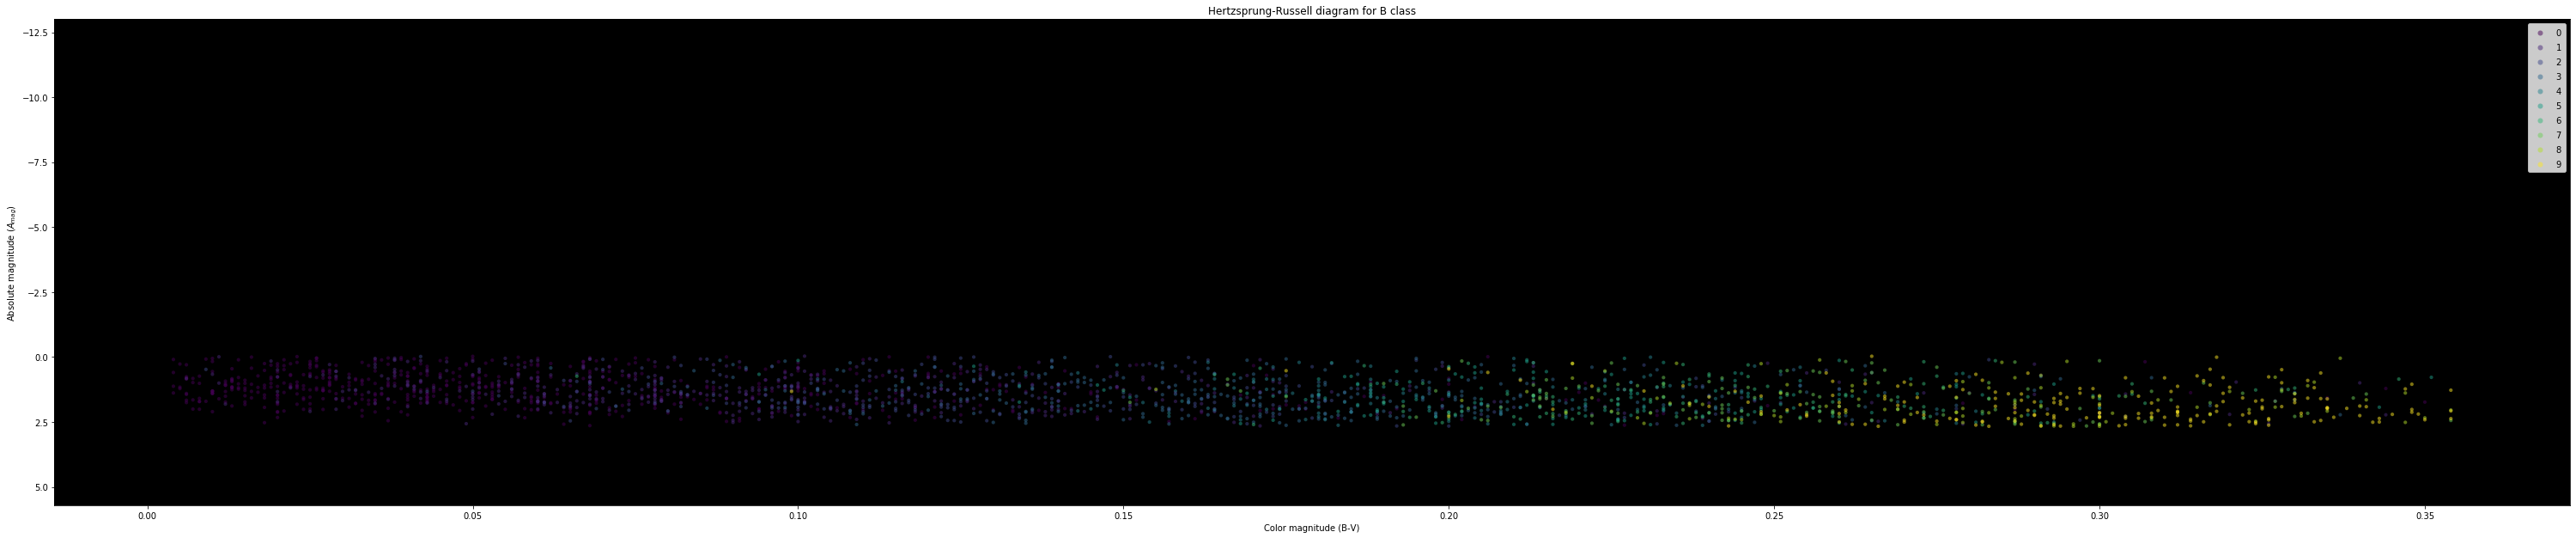

In [634]:
fig, ax = plt.subplots(figsize=(52.5,10.4))
scatter=ax.scatter(A_new["B-V"],A_new["Amag"], c=A_new["SpType"], marker = '.', s = 70, linewidth = 0.01,alpha=0.5)
legend1=ax.legend(*scatter.legend_elements())
    

#ax.legend()
plt.xlabel("Color magnitude (B-V)")
plt.ylabel("Absolute magnitude ($A_{mag}$)")
plt.title("Hertzsprung-Russell diagram for B class")
#py.xlim(-4, 1.9)
plt.ylim(5.7, -13) 

Color_BC = plt.gca()
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1)
plt.show()

# Experimenting various ML models 

In [601]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]




train_set, test_set = split_train_test(A_new, 0.2)
train_setx=np.array((train_set.drop(["SpType","e_Plx","Vmag","e_B-V","e_V-I","Temp"],1)))
train_sety=np.array(train_set["SpType"])
test_setx=np.array((test_set.drop(["SpType","e_Plx","Vmag","e_B-V","e_V-I","Temp"],1)))
test_sety=np.array(test_set["SpType"])


C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


## For Imbalanced Data train  

In [212]:


# Assuming you have your training data in X_train and corresponding labels in y_train

# Specify the classes to duplicate and their respective duplication factors
duplicate_classes = {}  # Dictionary mapping class labels to duplication factors

# Initialize empty lists to store duplicated data
duplicated_X_train = []
duplicated_y_train = []

# Iterate over the original training data and labels
for x, y in zip(train_setx, train_sety):
    duplicated_X_train.append(x)
    duplicated_y_train.append(y)
    
    # Check if the current class needs duplication
    if y in duplicate_classes:
        duplication_factor = duplicate_classes[y]
        
        # Duplicate the data and labels
        for _ in range(duplication_factor - 1):
            duplicated_X_train.append(x)
            duplicated_y_train.append(y)

# Convert the duplicated data and labels to NumPy arrays
duplicated_X_train = np.array(duplicated_X_train)
duplicated_y_train = np.array(duplicated_y_train)

# Now you have duplicated_X_train and duplicated_y_train which contain the duplicated training data

# Combine the original and duplicated data if desired
train_setx = np.concatenate((train_setx, duplicated_X_train), axis=0)
train_sety = np.concatenate((train_sety, duplicated_y_train), axis=0)

# Now you can use combined_X_train and combined_y_train for training your machine learning model

In [161]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model,preprocessing

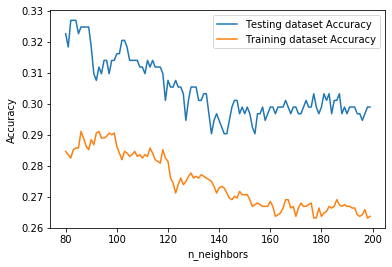

In [542]:
neighbors = np.arange( 80,200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_setx,train_sety)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(train_setx,train_sety)
    test_accuracy[i] = knn.score(test_setx,test_sety)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [635]:
r_forest = RandomForestClassifier()
r_forest.fit(train_setx,train_sety)
predicted = r_forest.predict(test_setx)
score = r_forest.score(test_setx, test_sety)

In [636]:
print(score)

0.3588235294117647


In [639]:
import lightgbm
from lightgbm import LGBMRegressor 
o=lightgbm.LGBMClassifier().fit(train_setx,train_sety)
acc6=o.score(test_setx,test_sety)
print(acc6)

0.3333333333333333


In [640]:
lgbmr = LGBMRegressor().fit(train_setx,train_sety)
acc5=lgbmr.score(test_setx,test_sety)
print(acc5)

0.610286051196919


In [641]:
cg_b = CatBoostClassifier()
cg_b.fit(train_setx,train_sety)
predicted = cg_b.predict(test_setx)
score5 = cg_b.score(test_setx, test_sety)


Learning rate set to 0.082065
0:	learn: 2.1640627	total: 39.6ms	remaining: 39.6s
1:	learn: 2.0722285	total: 73ms	remaining: 36.4s
2:	learn: 1.9968075	total: 106ms	remaining: 35.2s
3:	learn: 1.9325797	total: 153ms	remaining: 38.1s
4:	learn: 1.8868936	total: 187ms	remaining: 37.3s
5:	learn: 1.8447179	total: 223ms	remaining: 36.9s
6:	learn: 1.8038457	total: 259ms	remaining: 36.8s
7:	learn: 1.7667205	total: 296ms	remaining: 36.7s
8:	learn: 1.7377338	total: 332ms	remaining: 36.6s
9:	learn: 1.7085018	total: 367ms	remaining: 36.3s
10:	learn: 1.6825913	total: 401ms	remaining: 36.1s
11:	learn: 1.6578903	total: 435ms	remaining: 35.9s
12:	learn: 1.6356442	total: 479ms	remaining: 36.4s
13:	learn: 1.6177715	total: 517ms	remaining: 36.4s
14:	learn: 1.6007018	total: 553ms	remaining: 36.3s
15:	learn: 1.5840330	total: 589ms	remaining: 36.2s
16:	learn: 1.5691946	total: 626ms	remaining: 36.2s
17:	learn: 1.5578186	total: 660ms	remaining: 36s
18:	learn: 1.5444479	total: 695ms	remaining: 35.9s
19:	learn: 1.

165:	learn: 1.1891216	total: 3.57s	remaining: 18s
166:	learn: 1.1883966	total: 3.6s	remaining: 18s
167:	learn: 1.1875675	total: 3.62s	remaining: 17.9s
168:	learn: 1.1862164	total: 3.65s	remaining: 17.9s
169:	learn: 1.1844221	total: 3.67s	remaining: 17.9s
170:	learn: 1.1824383	total: 3.69s	remaining: 17.9s
171:	learn: 1.1808374	total: 3.71s	remaining: 17.9s
172:	learn: 1.1798191	total: 3.74s	remaining: 17.9s
173:	learn: 1.1784923	total: 3.76s	remaining: 17.9s
174:	learn: 1.1763516	total: 3.78s	remaining: 17.8s
175:	learn: 1.1753269	total: 3.81s	remaining: 17.8s
176:	learn: 1.1741229	total: 3.83s	remaining: 17.8s
177:	learn: 1.1728597	total: 3.87s	remaining: 17.9s
178:	learn: 1.1719708	total: 3.9s	remaining: 17.9s
179:	learn: 1.1706436	total: 3.93s	remaining: 17.9s
180:	learn: 1.1697703	total: 3.96s	remaining: 17.9s
181:	learn: 1.1680711	total: 3.98s	remaining: 17.9s
182:	learn: 1.1665773	total: 4s	remaining: 17.9s
183:	learn: 1.1660164	total: 4.02s	remaining: 17.8s
184:	learn: 1.1643191

327:	learn: 1.0215444	total: 7.64s	remaining: 15.7s
328:	learn: 1.0200097	total: 7.67s	remaining: 15.7s
329:	learn: 1.0190304	total: 7.7s	remaining: 15.6s
330:	learn: 1.0181339	total: 7.73s	remaining: 15.6s
331:	learn: 1.0174858	total: 7.76s	remaining: 15.6s
332:	learn: 1.0163822	total: 7.79s	remaining: 15.6s
333:	learn: 1.0153878	total: 7.81s	remaining: 15.6s
334:	learn: 1.0146127	total: 7.84s	remaining: 15.6s
335:	learn: 1.0139551	total: 7.87s	remaining: 15.6s
336:	learn: 1.0128074	total: 7.9s	remaining: 15.5s
337:	learn: 1.0119652	total: 7.93s	remaining: 15.5s
338:	learn: 1.0108602	total: 7.96s	remaining: 15.5s
339:	learn: 1.0100168	total: 7.98s	remaining: 15.5s
340:	learn: 1.0091193	total: 8.03s	remaining: 15.5s
341:	learn: 1.0085051	total: 8.05s	remaining: 15.5s
342:	learn: 1.0076837	total: 8.08s	remaining: 15.5s
343:	learn: 1.0064252	total: 8.11s	remaining: 15.5s
344:	learn: 1.0051337	total: 8.14s	remaining: 15.5s
345:	learn: 1.0045333	total: 8.17s	remaining: 15.4s
346:	learn: 1.

492:	learn: 0.8933219	total: 12.4s	remaining: 12.7s
493:	learn: 0.8925032	total: 12.4s	remaining: 12.7s
494:	learn: 0.8919154	total: 12.4s	remaining: 12.7s
495:	learn: 0.8911646	total: 12.4s	remaining: 12.6s
496:	learn: 0.8905201	total: 12.4s	remaining: 12.6s
497:	learn: 0.8899581	total: 12.5s	remaining: 12.6s
498:	learn: 0.8892149	total: 12.5s	remaining: 12.5s
499:	learn: 0.8884369	total: 12.5s	remaining: 12.5s
500:	learn: 0.8877277	total: 12.5s	remaining: 12.5s
501:	learn: 0.8868656	total: 12.5s	remaining: 12.4s
502:	learn: 0.8861748	total: 12.5s	remaining: 12.4s
503:	learn: 0.8855501	total: 12.6s	remaining: 12.4s
504:	learn: 0.8848867	total: 12.6s	remaining: 12.3s
505:	learn: 0.8840362	total: 12.6s	remaining: 12.3s
506:	learn: 0.8830903	total: 12.6s	remaining: 12.3s
507:	learn: 0.8824730	total: 12.6s	remaining: 12.2s
508:	learn: 0.8817925	total: 12.6s	remaining: 12.2s
509:	learn: 0.8814168	total: 12.6s	remaining: 12.1s
510:	learn: 0.8804690	total: 12.7s	remaining: 12.1s
511:	learn: 

651:	learn: 0.7946371	total: 15.6s	remaining: 8.31s
652:	learn: 0.7941169	total: 15.6s	remaining: 8.29s
653:	learn: 0.7934390	total: 15.6s	remaining: 8.26s
654:	learn: 0.7928384	total: 15.6s	remaining: 8.23s
655:	learn: 0.7918057	total: 15.6s	remaining: 8.21s
656:	learn: 0.7913214	total: 15.7s	remaining: 8.19s
657:	learn: 0.7905369	total: 15.7s	remaining: 8.16s
658:	learn: 0.7897433	total: 15.7s	remaining: 8.14s
659:	learn: 0.7890454	total: 15.8s	remaining: 8.12s
660:	learn: 0.7882719	total: 15.8s	remaining: 8.1s
661:	learn: 0.7874759	total: 15.8s	remaining: 8.07s
662:	learn: 0.7866475	total: 15.8s	remaining: 8.05s
663:	learn: 0.7858080	total: 15.9s	remaining: 8.03s
664:	learn: 0.7851133	total: 15.9s	remaining: 8s
665:	learn: 0.7847830	total: 15.9s	remaining: 7.98s
666:	learn: 0.7842572	total: 15.9s	remaining: 7.96s
667:	learn: 0.7838925	total: 16s	remaining: 7.94s
668:	learn: 0.7829564	total: 16s	remaining: 7.91s
669:	learn: 0.7821297	total: 16s	remaining: 7.89s
670:	learn: 0.7816947	

818:	learn: 0.7047399	total: 19.9s	remaining: 4.41s
819:	learn: 0.7042390	total: 20s	remaining: 4.38s
820:	learn: 0.7038207	total: 20s	remaining: 4.36s
821:	learn: 0.7031352	total: 20s	remaining: 4.33s
822:	learn: 0.7026069	total: 20s	remaining: 4.31s
823:	learn: 0.7023460	total: 20.1s	remaining: 4.28s
824:	learn: 0.7016418	total: 20.1s	remaining: 4.26s
825:	learn: 0.7010291	total: 20.1s	remaining: 4.23s
826:	learn: 0.7006331	total: 20.1s	remaining: 4.21s
827:	learn: 0.6998730	total: 20.1s	remaining: 4.18s
828:	learn: 0.6991094	total: 20.2s	remaining: 4.16s
829:	learn: 0.6986166	total: 20.2s	remaining: 4.13s
830:	learn: 0.6981339	total: 20.2s	remaining: 4.11s
831:	learn: 0.6977765	total: 20.2s	remaining: 4.08s
832:	learn: 0.6970253	total: 20.3s	remaining: 4.06s
833:	learn: 0.6965225	total: 20.3s	remaining: 4.04s
834:	learn: 0.6961148	total: 20.3s	remaining: 4.01s
835:	learn: 0.6956472	total: 20.3s	remaining: 3.98s
836:	learn: 0.6949372	total: 20.3s	remaining: 3.96s
837:	learn: 0.694500

985:	learn: 0.6304913	total: 23.8s	remaining: 337ms
986:	learn: 0.6301235	total: 23.8s	remaining: 313ms
987:	learn: 0.6296826	total: 23.8s	remaining: 289ms
988:	learn: 0.6293755	total: 23.8s	remaining: 265ms
989:	learn: 0.6291822	total: 23.8s	remaining: 241ms
990:	learn: 0.6289724	total: 23.9s	remaining: 217ms
991:	learn: 0.6284158	total: 23.9s	remaining: 193ms
992:	learn: 0.6280030	total: 23.9s	remaining: 168ms
993:	learn: 0.6276255	total: 23.9s	remaining: 144ms
994:	learn: 0.6271867	total: 23.9s	remaining: 120ms
995:	learn: 0.6268099	total: 24s	remaining: 96.2ms
996:	learn: 0.6263286	total: 24s	remaining: 72.2ms
997:	learn: 0.6259215	total: 24s	remaining: 48.1ms
998:	learn: 0.6253136	total: 24s	remaining: 24.1ms
999:	learn: 0.6248907	total: 24.1s	remaining: 0us


In [642]:
print(score5)

0.3333333333333333


In [551]:
import tensorflow as tf

C:\Users\RAKESH\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\RAKESH\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\RAKESH\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\RAKESH\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [552]:
from tensorflow.keras import layers, models, regularizers

In [643]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.0001), input_shape=(train_setx.shape[1],)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))

model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_setx, train_sety, epochs=100, batch_size=10)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_setx,test_sety )
print("Accuracy:", accuracy)

Epoch 1/100
2044/2044 [==============================] - 0s 233us/sample - loss: 2.2077 - acc: 0.2510
Epoch 2/100
2044/2044 [==============================] - 0s 167us/sample - loss: 2.0423 - acc: 0.2691
Epoch 3/100
2044/2044 [==============================] - 0s 185us/sample - loss: 1.7619 - acc: 0.3571
Epoch 4/100
2044/2044 [==============================] - 0s 198us/sample - loss: 1.6292 - acc: 0.3933
Epoch 5/100
2044/2044 [==============================] - 1s 266us/sample - loss: 1.5967 - acc: 0.4022
Epoch 6/100
2044/2044 [==============================] - 1s 251us/sample - loss: 1.5664 - acc: 0.4144
Epoch 7/100
2044/2044 [==============================] - 0s 244us/sample - loss: 1.5454 - acc: 0.4090s - loss: 1.6005 - acc
Epoch 8/100
2044/2044 [==============================] - 1s 251us/sample - loss: 1.5343 - acc: 0.4100
Epoch 9/100
2044/2044 [==============================] - 1s 265us/sample - loss: 1.5404 - acc: 0.4075
Epoch 10/100
2044/2044 [==============================] - 0s

# Mtype classification

# KType Classification

In [692]:
K_cls=df3[df3['SpType'].str.contains('K', regex=False)]


In [693]:
K_cls.replace([np.inf, -np.inf], np.nan, inplace=True)
K_cls=K_cls.dropna()

C:\Users\RAKESH\anaconda\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [694]:
Q1 = K_cls['Amag'].quantile(0.25)
Q3 = K_cls['Amag'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where IQR > 1.5
K_cls = K_cls[(K_cls['Amag'] - Q1) / IQR <= 1.5]
K_cls = K_cls[(K_cls['Amag'] - Q3) / IQR >= -1.5]

# Reset the index of the DataFrame
K_cls = K_cls.reset_index(drop=True)

In [695]:
Q1 = K_cls['Temp'].quantile(0.25)
Q3 = K_cls['Temp'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where IQR > 1.5
K_cls = K_cls[(K_cls['Temp'] - Q1) / IQR <= 1.5]
K_cls = K_cls[(K_cls['Temp'] - Q3) / IQR >= -1.5]

# Reset the index of the DataFrame
K_cls = K_cls.reset_index(drop=True)

In [696]:
K_cls

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
0,8.43,4.06,1.16,1.484,0.020,1.50,0.03,1.41,K4III,1.472630,3817.732082
1,8.80,3.49,1.48,1.128,0.023,1.09,0.02,1.04,K0III,1.514127,4455.034400
2,7.25,5.11,0.99,1.200,0.015,1.16,0.01,1.16,K0,0.792105,4308.727009
3,8.60,2.45,1.16,1.166,0.018,1.13,0.02,1.23,K2,0.545830,4376.540477
4,7.55,5.84,0.95,1.438,0.017,1.43,0.03,1.36,K2,1.382064,3889.209072
...,...,...,...,...,...,...,...,...,...,...,...
14990,7.78,2.35,1.08,1.211,0.020,1.17,0.02,1.17,K0III,-0.364661,4287.256280
14991,7.28,5.78,0.84,1.044,0.007,1.01,0.01,0.99,K0III,1.089639,4639.519506
14992,9.27,0.93,1.32,1.147,0.030,1.11,0.03,1.03,K0,-0.887585,4415.421247
14993,8.47,3.00,1.13,1.011,0.019,0.99,0.01,0.99,K0III,0.855606,4716.481821


In [697]:
K_0 = K_cls[K_cls['SpType'].str.contains('K0', regex=True)]
k_0 = K_cls[K_cls['SpType'].str.contains('K0', regex=True)]
K_0


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
1,8.80,3.49,1.48,1.128,0.023,1.09,0.02,1.04,K0III,1.514127,4455.034400
2,7.25,5.11,0.99,1.200,0.015,1.16,0.01,1.16,K0,0.792105,4308.727009
6,7.68,6.30,0.96,1.150,0.014,1.11,0.01,1.06,K0,1.676703,4409.234032
9,8.12,3.47,1.27,1.329,0.019,1.29,0.02,1.24,K0,0.821647,4070.261921
12,7.66,4.21,1.23,1.300,0.014,1.26,0.01,1.29,K0,0.781410,4121.437438
...,...,...,...,...,...,...,...,...,...,...,...
14990,7.78,2.35,1.08,1.211,0.020,1.17,0.02,1.17,K0III,-0.364661,4287.256280
14991,7.28,5.78,0.84,1.044,0.007,1.01,0.01,0.99,K0III,1.089639,4639.519506
14992,9.27,0.93,1.32,1.147,0.030,1.11,0.03,1.03,K0,-0.887585,4415.421247
14993,8.47,3.00,1.13,1.011,0.019,0.99,0.01,0.99,K0III,0.855606,4716.481821


In [698]:
k_0=K_0[(K_0["SpType"]=="K0")|(K_0["SpType"]=="K0I")|(K_0["SpType"]=="K0II")|(K_0["SpType"]=="K0III")|(K_0["SpType"]=="K0IV")|(K_0["SpType"]=="K0V")]
k_0
k_0["SpType"]=0
k_0
k1_0=k_0
k_0.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.0,7824.000000,7824.000000
mean,8.004914,4.025299,1.028717,1.102217,0.021406,1.071632,0.018640,1.055937,0.0,0.769076,4522.508068
std,0.888739,2.110719,0.256422,0.110028,0.032384,0.107564,0.016506,0.100287,0.0,0.773574,226.756417
min,2.040000,0.470000,0.450000,0.942000,0.000000,0.880000,0.000000,0.120000,0.0,-1.130931,3793.506494
25%,7.400000,2.610000,0.850000,1.021000,0.012000,1.000000,0.010000,0.990000,0.0,0.264996,4394.867731
50%,8.070000,3.700000,1.010000,1.079000,0.016000,1.040000,0.010000,1.030000,0.0,0.826685,4560.729962
75%,8.650000,4.950000,1.190000,1.157000,0.024000,1.120000,0.020000,1.090000,0.0,1.322934,4692.877012
max,11.290000,34.040000,1.980000,1.500000,0.495000,1.640000,0.740000,1.780000,0.0,2.353666,4886.452318


In [699]:
K_1 = K_cls[K_cls['SpType'].str.contains('K1', regex=True)]
k_1 = K_cls[K_cls['SpType'].str.contains('K1', regex=True)]
K_1

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
8,8.57,1.19,1.20,1.035,0.016,1.01,0.01,0.95,K1III,-1.052265,4660.245577
14,8.29,2.83,1.09,1.183,0.014,1.14,0.01,1.13,K1IIICNIV,0.548932,4342.356140
19,7.04,7.50,0.84,1.060,0.015,1.11,0.02,1.11,K1III,1.415306,4603.148561
27,8.85,2.62,1.16,1.113,0.018,1.08,0.02,1.08,K1III,0.941506,4486.839505
33,6.46,6.78,0.88,1.176,0.003,1.14,0.00,1.14,K1III,0.616148,4356.363995
...,...,...,...,...,...,...,...,...,...,...,...
14965,8.38,3.92,1.06,1.157,0.017,1.12,0.01,1.05,K1III,1.346430,4394.867731
14972,6.28,6.71,1.08,1.079,0.002,1.04,0.00,1.04,K1IIICN...,0.413613,4560.729962
14984,8.69,3.26,1.28,1.094,0.018,1.06,0.02,1.06,K1III,1.256088,4527.818004
14985,8.92,2.04,0.99,1.118,0.046,1.08,0.05,1.09,K1III,0.468151,4476.184907


In [700]:
k_1=K_1[(K_1["SpType"]=="K1")|(K_1["SpType"]=="K1I")|(K_1["SpType"]=="K1II")|(K_1["SpType"]=="K1III")|(K_1["SpType"]=="K1IV")|(K_1["SpType"]=="K1V")]
k_1
k_1["SpType"]=1
k_1
k1_1=k_1
k_1.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.0,1420.000000,1420.000000
mean,7.968577,4.193908,1.003401,1.159491,0.021823,1.122535,0.020211,1.109648,1.0,0.764856,4397.605133
std,0.995484,2.678548,0.256991,0.089213,0.037475,0.087342,0.011977,0.084690,0.0,0.803254,180.365679
min,3.680000,0.730000,0.460000,0.950000,0.000000,0.900000,0.000000,0.760000,1.0,-1.129087,3811.645570
25%,7.427500,2.590000,0.800000,1.099000,0.011000,1.060000,0.010000,1.060000,1.0,0.233004,4277.570783
50%,8.205000,3.540000,0.980000,1.153500,0.018000,1.120000,0.020000,1.100000,1.0,0.843495,4402.038831
75%,8.730000,5.040000,1.182500,1.216000,0.025000,1.180000,0.030000,1.150000,1.0,1.367167,4516.958062
max,9.970000,32.140000,1.980000,1.488000,0.495000,1.510000,0.100000,1.650000,1.0,2.348709,4866.084384


In [701]:
K_2 = K_cls[K_cls['SpType'].str.contains('K2', regex=True)]
k_2 = K_cls[K_cls['SpType'].str.contains('K2', regex=True)]
K_2

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
3,8.60,2.45,1.16,1.166,0.018,1.13,0.02,1.23,K2,0.545830,4376.540477
4,7.55,5.84,0.95,1.438,0.017,1.43,0.03,1.36,K2,1.382064,3889.209072
5,7.63,1.84,1.05,1.453,0.018,1.46,0.03,1.12,K2,-1.045911,3865.597156
7,7.91,2.41,1.01,1.104,0.018,1.07,0.02,1.07,K2,-0.179915,4506.152751
10,8.08,3.45,0.94,1.156,0.014,1.12,0.01,1.10,K2III,0.769095,4396.914042
...,...,...,...,...,...,...,...,...,...,...,...
14975,8.26,1.71,0.99,1.243,0.022,1.20,0.02,1.18,K2,-0.575019,4226.050863
14980,8.97,1.85,1.24,1.005,0.037,0.98,0.03,1.18,K2,0.305859,4730.765334
14986,8.05,3.82,0.96,1.030,0.010,1.00,0.01,1.00,K2,0.960317,4671.844618
14987,8.01,2.95,1.03,1.345,0.014,1.31,0.02,1.27,K2III,0.359110,4042.590924


In [702]:
k_2=K_2[(K_2["SpType"]=="K2")|(K_2["SpType"]=="K2I")|(K_2["SpType"]=="K2II")|(K_2["SpType"]=="K2III")|(K_2["SpType"]=="K2IV")|(K_1["SpType"]=="K2V")]
k_2
k_2["SpType"]=2
k_2
k1_2=k_2
k_2.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.0,3231.000000,3231.000000
mean,8.111136,3.524017,1.030319,1.244703,0.024530,1.213581,0.025215,1.197963,2.0,0.591323,4236.427131
std,0.882236,1.909275,0.266053,0.123740,0.031171,0.133059,0.020517,0.113183,0.0,0.842750,235.900484
min,3.250000,0.580000,0.470000,0.944000,0.000000,0.930000,0.000000,0.220000,2.0,-1.131824,3793.506494
25%,7.600000,2.260000,0.830000,1.157000,0.014000,1.120000,0.010000,1.130000,2.0,-0.045476,4058.107348
50%,8.220000,3.160000,1.020000,1.245000,0.019000,1.200000,0.020000,1.190000,2.0,0.601130,4222.286189
75%,8.720000,4.260000,1.200000,1.336000,0.028000,1.300000,0.030000,1.260000,2.0,1.216182,4394.867731
max,10.590000,32.170000,1.990000,1.500000,0.495000,1.940000,0.250000,1.710000,2.0,2.351813,4881.343449


In [703]:
K_3 = K_cls[K_cls['SpType'].str.contains('K3', regex=True)]
k_3 = K_cls[K_cls['SpType'].str.contains('K3', regex=True)]
K_3

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
26,8.53,2.53,1.00,1.274,0.018,1.23,0.02,1.28,K3III,0.545603,4168.476390
70,8.55,4.19,1.14,1.357,0.021,1.32,0.02,1.20,K3III,1.661070,4022.093926
80,8.79,1.16,1.17,1.234,0.020,1.19,0.02,1.28,K3III,-0.887710,4243.079227
95,7.38,2.89,0.71,1.326,0.012,1.29,0.01,1.26,K3III,-0.315511,4075.494327
99,8.21,2.98,1.01,1.339,0.015,1.30,0.02,1.22,K3III,0.581081,4052.921410
...,...,...,...,...,...,...,...,...,...,...,...
14891,7.20,6.55,0.87,1.179,0.009,1.14,0.01,1.12,K3III,1.281206,4350.349039
14954,7.77,3.22,1.09,1.338,0.013,1.30,0.01,1.28,K3III,0.309279,4054.648518
14981,8.19,2.12,0.76,1.412,0.017,1.39,0.02,1.33,K3III,-0.178321,3930.856006
14982,7.77,1.85,0.80,1.336,0.003,1.30,0.00,1.30,K3IIICN...,-0.894141,4058.107348


In [704]:
k_3=K_3[(K_3["SpType"]=="K3")|(K_3["SpType"]=="K3I")|(K_3["SpType"]=="K3II")|(K_3["SpType"]=="K3III")|(K_3["SpType"]=="K3IV")|(K_3["SpType"]=="K3V")]
k_3
k_3["SpType"]=3
k_3
k1_3=k_3
k_3.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.0,624.000000,624.000000
mean,7.645433,3.874551,0.918205,1.378675,0.023899,1.359279,0.027949,1.327420,3.0,0.289867,3989.963475
std,1.037848,2.364688,0.227467,0.076012,0.045633,0.093758,0.019020,0.088297,0.0,0.771113,131.374171
min,3.600000,1.070000,0.450000,1.045000,0.000000,1.030000,0.000000,0.980000,3.0,-1.124308,3793.506494
25%,6.925000,2.447500,0.750000,1.338000,0.011000,1.300000,0.020000,1.280000,3.0,-0.328724,3896.749044
50%,7.925000,3.345000,0.890000,1.387500,0.017000,1.360000,0.020000,1.320000,3.0,0.273251,3970.960150
75%,8.462500,4.585000,1.080000,1.433250,0.025000,1.430000,0.040000,1.380000,3.0,0.831290,4054.648518
max,9.380000,18.670000,1.920000,1.500000,0.495000,1.540000,0.160000,1.570000,3.0,2.287048,4637.228591


In [705]:
K_4 = K_cls[K_cls['SpType'].str.contains('K4', regex=True)]
k_4 = K_cls[K_cls['SpType'].str.contains('K4', regex=True)]
K_4

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
0,8.43,4.06,1.16,1.484,0.020,1.50,0.03,1.41,K4III,1.472630,3817.732082
54,6.25,5.34,0.77,1.368,0.008,1.34,0.01,1.34,K4IIIb,-0.112294,4003.494547
139,6.18,5.93,0.70,1.467,0.007,1.48,0.01,1.44,K4III,0.045273,3843.826923
146,5.29,5.33,0.87,1.478,0.008,1.60,0.03,1.60,K4III,-1.076364,3826.899848
165,6.14,4.23,0.80,1.490,0.004,1.51,0.01,1.51,K4III,-0.728298,3808.609875
...,...,...,...,...,...,...,...,...,...,...,...
14802,7.23,2.41,0.88,1.466,0.016,1.48,0.02,1.45,K4III,-0.859915,3845.373476
14858,6.09,4.51,0.85,1.452,0.004,1.45,0.01,1.45,K4III,-0.639117,3867.161998
14875,5.70,7.09,0.92,1.488,0.004,1.51,0.01,1.51,K4III,-0.046769,3811.645570
14879,7.75,2.57,0.93,1.495,0.014,1.52,0.02,1.53,K4III,-0.200334,3801.042587


In [706]:
k_4=K_4[(K_4["SpType"]=="K4")|(K_4["SpType"]=="K4I")|(K_4["SpType"]=="K4II")|(K_4["SpType"]=="K4III")|(K_4["SpType"]=="K4IV")|(K_4["SpType"]=="K4V")]
k_4
k_4["SpType"]=4
k_4
k1_4=k_4
k_4.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.0,236.000000,236.000000
mean,7.247034,4.194915,0.887373,1.427826,0.020792,1.426568,0.025424,1.412585,4.0,0.097133,3908.046281
std,1.128460,2.249133,0.217420,0.061161,0.045340,0.083618,0.015167,0.090782,0.0,0.685000,102.101539
min,3.190000,1.180000,0.450000,1.190000,0.000000,1.080000,0.000000,0.990000,4.0,-1.113192,3793.506494
25%,6.430000,2.675000,0.720000,1.399000,0.009000,1.380000,0.017500,1.357500,4.0,-0.418960,3835.728823
50%,7.470000,3.665000,0.870000,1.442000,0.015000,1.440000,0.020000,1.440000,4.0,0.101306,3882.883248
75%,8.062500,5.070000,1.020000,1.472250,0.022000,1.490000,0.040000,1.470000,4.0,0.575919,3952.029969
max,9.340000,14.390000,1.540000,1.500000,0.495000,1.620000,0.090000,1.620000,4.0,2.301070,4328.442415


In [707]:
K_5 = K_cls[K_cls['SpType'].str.contains('K5', regex=True)]
k_5 = K_cls[K_cls['SpType'].str.contains('K5', regex=True)]
K_5

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
17,8.47,5.61,1.10,1.350,0.027,1.32,0.03,1.59,K5,2.214814,4034.024072
18,8.66,3.57,0.75,1.364,0.030,1.33,0.04,1.50,K5,1.423341,4010.237162
21,8.98,2.38,1.09,1.500,0.040,1.50,0.10,1.50,K5,0.862885,3793.506494
65,6.97,3.07,0.93,1.444,0.011,1.44,0.02,1.35,K5,-0.594308,3879.728362
108,8.50,1.70,1.10,1.166,0.022,1.13,0.02,1.56,K5,-0.347755,4376.540477
...,...,...,...,...,...,...,...,...,...,...,...
14868,6.59,5.13,0.60,1.471,0.004,1.48,0.02,1.48,K5III,0.140587,3837.653629
14911,7.70,4.35,0.79,1.293,0.015,1.25,0.02,1.22,K5,0.892446,4133.992295
14938,6.52,5.40,0.80,1.488,0.010,1.51,0.01,1.46,K5,0.181969,3811.645570
14943,9.78,0.75,1.50,1.371,0.055,1.34,0.07,1.57,K5,-0.844694,3998.453083


In [708]:
k_5=K_5[(K_5["SpType"]=="K5")|(K_5["SpType"]=="K5I")|(K_5["SpType"]=="K5II")|(K_5["SpType"]=="K5III")|(K_5["SpType"]=="K5IV")|(K_5["SpType"]=="K5V")]
k_5
k_5["SpType"]=5
k_5
k1_5=k_5
k_5.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000
mean,8.286152,3.054523,1.054930,1.344258,0.026529,1.325595,0.037031,1.470247,5.0,0.483548,4057.734051
std,0.890459,1.465991,0.278573,0.130951,0.015168,0.148183,0.023988,0.155905,0.0,0.878684,239.050308
min,4.900000,0.490000,0.460000,0.960000,0.000000,0.950000,0.000000,0.950000,5.0,-1.122735,3793.506494
25%,7.880000,1.990000,0.830000,1.254000,0.015000,1.210000,0.020000,1.380000,5.0,-0.198494,3862.471423
50%,8.440000,2.830000,1.050000,1.378000,0.023000,1.350000,0.030000,1.540000,5.0,0.458753,3986.741000
75%,8.910000,3.780000,1.270000,1.455000,0.035000,1.460000,0.050000,1.580000,5.0,1.169409,4205.431655
max,10.690000,11.700000,1.860000,1.500000,0.137000,1.610000,0.150000,2.020000,5.0,2.332193,4840.875442


In [709]:
K_6 = K_cls[K_cls['SpType'].str.contains('K6', regex=True)]
k_6 = K_cls[K_cls['SpType'].str.contains('K1', regex=True)]
K_6

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
7335,5.80,8.54,0.67,1.330,0.004,1.29,0.01,1.28,K6III,0.457289,4068.520901
8772,9.43,2.98,1.50,1.327,0.067,1.29,0.08,1.67,K6,1.801081,4073.748632
9921,5.93,5.11,0.55,1.369,0.005,1.34,0.01,1.33,K6III,-0.527895,4001.812586


In [710]:
k_6=K_6[(K_6["SpType"]=="K6")|(K_6["SpType"]=="K6I")|(K_6["SpType"]=="K6II")|(K_6["SpType"]=="K6III")|(K_6["SpType"]=="K6IV")|(K_6["SpType"]=="K6V")]
k_6
k_6["SpType"]=6
k_6
k1_6=k_6
k_6.describe()

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000
mean,7.053333,5.543333,0.906667,1.342000,0.025333,1.306667,0.033333,1.426667,6.0,0.576825,4048.027373
std,2.059280,2.805215,0.517333,0.023431,0.036088,0.028868,0.040415,0.212211,0.0,1.169081,40.108443
min,5.800000,2.980000,0.550000,1.327000,0.004000,1.290000,0.010000,1.280000,6.0,-0.527895,4001.812586
25%,5.865000,4.045000,0.610000,1.328500,0.004500,1.290000,0.010000,1.305000,6.0,-0.035303,4035.166744
50%,5.930000,5.110000,0.670000,1.330000,0.005000,1.290000,0.010000,1.330000,6.0,0.457289,4068.520901
75%,7.680000,6.825000,1.085000,1.349500,0.036000,1.315000,0.045000,1.500000,6.0,1.129185,4071.134766
max,9.430000,8.540000,1.500000,1.369000,0.067000,1.340000,0.080000,1.670000,6.0,1.801081,4073.748632


In [711]:
K_7 = K_cls[K_cls['SpType'].str.contains('K7', regex=True)]
k_7 = K_cls[K_cls['SpType'].str.contains('K7', regex=True)]
K_7

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
61,8.99,3.30,1.34,1.199,0.035,1.16,0.03,1.68,K7,1.582570,4310.690076
357,9.55,1.45,1.53,1.272,0.020,1.33,0.14,1.33,K7,0.356840,4172.141327
464,8.89,1.32,1.21,1.419,0.033,1.40,0.05,1.68,K7,-0.507130,3919.552239
506,8.95,3.21,1.34,1.498,0.054,1.52,0.08,1.72,K7,1.482525,3796.517200
1144,9.21,4.05,1.50,1.252,0.040,1.21,0.04,1.69,K7,2.247275,4209.164928
2228,9.93,1.95,1.76,1.311,0.020,1.37,0.14,1.37,K7,1.380173,4101.868540
2661,9.37,2.45,1.43,0.986,0.031,0.97,0.03,1.59,K7,1.315830,4776.605013
3245,9.23,3.93,1.30,1.366,0.071,1.33,0.09,1.70,K7,2.201963,4006.862896
3332,8.80,1.49,1.24,1.459,0.044,1.47,0.07,1.70,K7,-0.334069,3856.235712
3497,8.74,4.36,1.25,1.382,0.035,1.35,0.04,1.68,K7,1.937432,3980.080443


In [712]:
k_7=K_7[(K_7["SpType"]=="K7")|(K_7["SpType"]=="K7I")|(K_7["SpType"]=="K7II")|(K_7["SpType"]=="K7III")|(K_7["SpType"]=="K7IV")|(K_7["SpType"]=="K2V")]
k_7
k_7["SpType"]=7
k_7
k1_7=k_7
k_7.describe()

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000
mean,8.959512,2.380732,1.183171,1.320244,0.033878,1.310000,0.054634,1.609024,7.0,0.646344,4104.326404
std,0.628442,1.099467,0.305421,0.150935,0.015413,0.168538,0.035574,0.124193,0.0,0.930463,283.636511
min,6.260000,0.950000,0.700000,0.986000,0.001000,0.970000,0.010000,1.150000,7.0,-1.061382,3796.517200
25%,8.770000,1.590000,0.950000,1.199000,0.025000,1.160000,0.030000,1.590000,7.0,0.030938,3901.925322
50%,9.030000,2.180000,1.190000,1.380000,0.033000,1.350000,0.040000,1.660000,7.0,0.668060,3983.407818
75%,9.240000,2.780000,1.360000,1.430000,0.042000,1.430000,0.070000,1.680000,7.0,1.482525,4310.690076
max,10.060000,6.410000,1.940000,1.498000,0.075000,1.520000,0.140000,1.720000,7.0,2.247275,4776.605013


In [713]:
K_8 = K_cls[K_cls['SpType'].str.contains('K8', regex=True)]
k_8 = K_cls[K_cls['SpType'].str.contains('K8', regex=True)]
K_8

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
2676,10.11,1.01,1.22,1.500,0.510,3.51,0.91,3.51,K8-M8e,0.131607,3793.506494
9335,9.91,0.86,1.46,1.077,0.056,1.04,0.05,2.64,K8,-0.417508,4565.156303
11555,9.54,3.26,1.40,1.328,0.066,1.29,0.08,1.76,K8,2.106088,4072.004497


In [714]:
k_8=K_8[(K_8["SpType"]=="K8")|(K_8["SpType"]=="K8I")|(K_8["SpType"]=="K8II")|(K_8["SpType"]=="K8III")|(K_8["SpType"]=="K8IV")|(K_8["SpType"]=="K8V")]
k_8
k_8["SpType"]=8
k_8
k1_8=k_8
k_8.describe()

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000
mean,9.72500,2.060000,1.430000,1.202500,0.061000,1.165000,0.065000,2.200000,8.0,0.844290,4318.580400
std,0.26163,1.697056,0.042426,0.177484,0.007071,0.176777,0.021213,0.622254,0.0,1.784452,348.710986
min,9.54000,0.860000,1.400000,1.077000,0.056000,1.040000,0.050000,1.760000,8.0,-0.417508,4072.004497
25%,9.63250,1.460000,1.415000,1.139750,0.058500,1.102500,0.057500,1.980000,8.0,0.213391,4195.292449
50%,9.72500,2.060000,1.430000,1.202500,0.061000,1.165000,0.065000,2.200000,8.0,0.844290,4318.580400
75%,9.81750,2.660000,1.445000,1.265250,0.063500,1.227500,0.072500,2.420000,8.0,1.475189,4441.868352
max,9.91000,3.260000,1.460000,1.328000,0.066000,1.290000,0.080000,2.640000,8.0,2.106088,4565.156303


In [715]:
K_9 = K_cls[K_cls['SpType'].str.contains('K9', regex=True)]
k_9 = K_cls[K_cls['SpType'].str.contains('K9', regex=True)]
K_9

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp


In [716]:
k_9=K_9[(K_9["SpType"]=="K9")|(K_9["SpType"]=="K9I")|(K_9["SpType"]=="K9II")|(K_9["SpType"]=="K9III")|(K_9["SpType"]=="K9IV")|(K_9["SpType"]=="K9V")]
k_9
k_9["SpType"]=9
k_9
k1_9=k_9
k_9.describe()

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [717]:
K_new=pd.concat([k_0,k_1,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9],ignore_index=True)
#A_new.drop_duplicates(subset=['Vmag',"Plx","e_Plx","B-V","Amag","Temp"],inplace=True)
K_new['SpType']=K_new['SpType'].astype(str).astype(int)
K_new.describe()


,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
count,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000
mean,8.018226,3.857157,1.021601,1.173946,0.022627,1.144413,0.022109,1.139866,1.095710,0.677573,4380.575597
std,0.923419,2.131423,0.260487,0.145493,0.032792,0.150522,0.018642,0.163143,1.498057,0.812154,286.120940
min,2.040000,0.470000,0.450000,0.942000,0.000000,0.880000,0.000000,0.120000,0.000000,-1.131824,3793.506494
25%,7.450000,2.460000,0.830000,1.056000,0.012000,1.020000,0.010000,1.020000,0.000000,0.107355,4159.343435
50%,8.130000,3.470000,1.010000,1.145000,0.017000,1.110000,0.020000,1.100000,0.000000,0.726619,4419.556194
75%,8.690000,4.710000,1.190000,1.279000,0.026000,1.240000,0.030000,1.220000,2.000000,1.272865,4612.184893
max,11.290000,34.040000,1.990000,1.500000,0.495000,1.940000,0.740000,2.640000,8.000000,2.353666,4886.452318


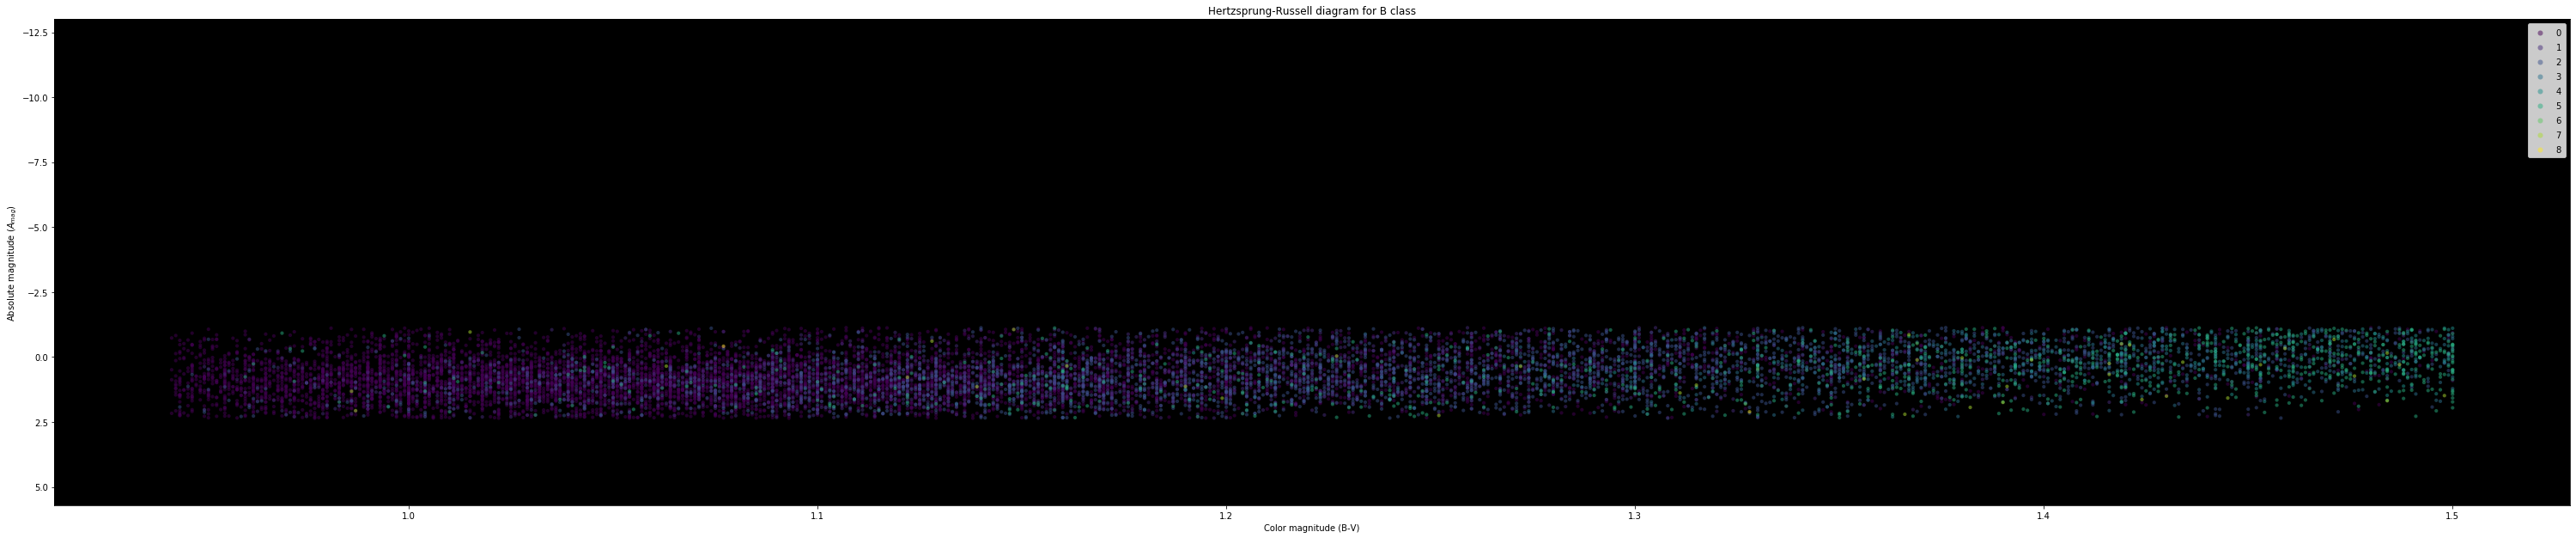

In [718]:
fig, ax = plt.subplots(figsize=(52.5,10.4))
scatter=ax.scatter(K_new["B-V"],K_new["Amag"], c=K_new["SpType"], marker = '.', s = 70, linewidth = 0.01,alpha=0.5)
legend1=ax.legend(*scatter.legend_elements())
    

#ax.legend()
plt.xlabel("Color magnitude (B-V)")
plt.ylabel("Absolute magnitude ($A_{mag}$)")
plt.title("Hertzsprung-Russell diagram for B class")
#py.xlim(-4, 1.9)
plt.ylim(5.7, -13) 

Color_BC = plt.gca()
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1)
plt.show()

In [725]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(K_new, 0.2)
train_setx=np.array((train_set.drop(["SpType","e_Plx","Vmag","e_B-V","e_V-I","Temp"],1)))
train_sety=np.array(train_set["SpType"])
test_setx=np.array((test_set.drop(["SpType","e_Plx","Vmag","e_B-V","e_V-I","Temp"],1)))
test_sety=np.array(test_set["SpType"])

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [726]:
r_forest = RandomForestClassifier()
r_forest.fit(train_setx,train_sety)
predicted = r_forest.predict(test_setx)
score = r_forest.score(test_setx, test_sety)
print(score)


0.6495457721872816


In [721]:
o=lightgbm.LGBMClassifier().fit(train_setx,train_sety)
acc6=o.score(test_setx,test_sety)
print(acc6)

0.5946890286512928


In [723]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.0001), input_shape=(train_setx.shape[1],)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
#model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))

model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_setx, train_sety, epochs=100, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_setx,test_sety )
print("Accuracy:", accuracy)

Epoch 1/100
11452/11452 [==============================] - 2s 153us/sample - loss: 1.4399 - acc: 0.5062
Epoch 2/100
11452/11452 [==============================] - 1s 123us/sample - loss: 1.2712 - acc: 0.5531
Epoch 3/100
11452/11452 [==============================] - 1s 129us/sample - loss: 1.1151 - acc: 0.5937
Epoch 4/100
11452/11452 [==============================] - 2s 194us/sample - loss: 1.0056 - acc: 0.6377
Epoch 5/100
11452/11452 [==============================] - 2s 189us/sample - loss: 0.9850 - acc: 0.6455
Epoch 6/100
11452/11452 [==============================] - 2s 135us/sample - loss: 0.9757 - acc: 0.6461
Epoch 7/100
11452/11452 [==============================] - 2s 161us/sample - loss: 0.9632 - acc: 0.6525
Epoch 8/100
11452/11452 [==============================] - 3s 219us/sample - loss: 0.9541 - acc: 0.6546
Epoch 9/100
11452/11452 [==============================] - 3s 248us/sample - loss: 0.9475 - acc: 0.6561
Epoch 10/100
11452/11452 [==============================] - 3s 2

11452/11452 [==============================] - 2s 209us/sample - loss: 0.8729 - acc: 0.6697
Epoch 80/100
11452/11452 [==============================] - 2s 204us/sample - loss: 0.8745 - acc: 0.6687
Epoch 81/100
11452/11452 [==============================] - 2s 209us/sample - loss: 0.8767 - acc: 0.6669
Epoch 82/100
11452/11452 [==============================] - 2s 212us/sample - loss: 0.8737 - acc: 0.6691
Epoch 83/100
11452/11452 [==============================] - 2s 208us/sample - loss: 0.8754 - acc: 0.6670
Epoch 84/100
11452/11452 [==============================] - 2s 202us/sample - loss: 0.8732 - acc: 0.6682s - loss: 
Epoch 85/100
11452/11452 [==============================] - 2s 207us/sample - loss: 0.8720 - acc: 0.6687
Epoch 86/100
11452/11452 [==============================] - 2s 209us/sample - loss: 0.8725 - acc: 0.6700
Epoch 87/100
11452/11452 [==============================] - 2s 164us/sample - loss: 0.8725 - acc: 0.6710s - loss: 0.8665 - acc: 
Epoch 88/100
11452/11452 [========

In [673]:
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [727]:
# Create a neural network model
def create_model(hidden_units=64, dropout_rate=0.0, weight_decay=0.0):
    model = models.Sequential()
    model.add(layers.Dense(hidden_units, activation='relu', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(train_setx.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
keras_model = KerasClassifier(build_fn=create_model)

# Define hyperparameters and their search space
param_grid = {
    'hidden_units': [32, 64, 128],
    'dropout_rate': [0.2, 0.4, 0.6],
    'weight_decay': [0.001, 0.0001]
}

# Create a grid search model
grid_search = GridSearchCV(estimator=keras_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3)

# Train and tune the model using grid search
grid_result = grid_search.fit(train_setx, train_sety)

# Get the best hyperparameters and model performance
best_params = grid_result.best_params_
best_score = grid_result.best_score_

# Create a final model using the best hyperparameters
final_model = create_model(hidden_units=best_params['hidden_units'],
                           dropout_rate=best_params['dropout_rate'],
                           weight_decay=best_params['weight_decay'])

# Train the final model
final_model.fit(train_setx, train_sety, epochs=10, batch_size=32)

# Evaluate the final model on the test set
loss, accuracy = final_model.evaluate(test_setx, test_sety)
print("Accuracy:", accuracy)







7634/7634 [==============================] - 1s 183us/sample - loss: 1.5095 - acc: 0.4979


KeyboardInterrupt: 

In [ ]:
print(best_params)

#  F group classification

In [ ]:
F_cls=df3[df3['SpType'].str.contains('F', regex=False)]

In [ ]:
F_cls.replace([np.inf, -np.inf], np.nan, inplace=True)
F_cls=F_cls.dropna()

In [ ]:
Q1 = F_cls['Amag'].quantile(0.25)
Q3 = F_cls['Amag'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where IQR > 1.5
F_cls = F_cls[(F_cls['Amag'] - Q1) / IQR <= 1.5]
F_cls = F_cls[(F_cls['Amag'] - Q3) / IQR >= -1.5]

# Reset the index of the DataFrame
F_cls = F_cls.reset_index(drop=True)

In [ ]:
Q1 = F_cls['Temp'].quantile(0.25)
Q3 = F_cls['Temp'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where IQR > 1.5
F_cls = F_cls[(F_cls['Temp'] - Q1) / IQR <= 1.5]
F_cls = F_cls[(F_cls['Temp'] - Q3) / IQR >= -1.5]

# Reset the index of the DataFrame
F_cls = F_cls.reset_index(drop=True)

In [ ]:
F_0 = F_cls[F_cls['SpType'].str.contains('F0', regex=True)]
f_0 = F_cls[F_cls['SpType'].str.contains('F0', regex=True)]
F_0


In [ ]:
f_0=F_0[(F_0["SpType"]=="F0")|(F_0["SpType"]=="F0I")|(F_0["SpType"]=="F0II")|(F_0["SpType"]=="F0III")|(F_0["SpType"]=="F0IV")|(F_0["SpType"]=="F0V")]
f_0
f_0["SpType"]=0
f_0
f1_0=f_0
f_0.describe()

In [ ]:
F_1 = F_cls[F_cls['SpType'].str.contains('F1', regex=True)]
f_1 = F_cls[F_cls['SpType'].str.contains('F1', regex=True)]
F_1

In [ ]:
f_1=F_1[(F_1["SpType"]=="F1")|(F_1["SpType"]=="F1I")|(F_1["SpType"]=="F1II")|(F_1["SpType"]=="F1III")|(F_1["SpType"]=="F1IV")|(F_1["SpType"]=="F1V")]
f_1
f_1["SpType"]=1
f_1
f1_1=f_1
f_1.describe()

In [ ]:
F_2 = F_cls[F_cls['SpType'].str.contains('F2', regex=True)]
f_2 = F_cls[F_cls['SpType'].str.contains('F2', regex=True)]
F_2

In [ ]:
f_2=F_2[(F_2["SpType"]=="F2")|(F_2["SpType"]=="F2I")|(F_2["SpType"]=="F2II")|(F_2["SpType"]=="F2III")|(F_2["SpType"]=="F2IV")|(F_2["SpType"]=="F2V")]
f_2
f_2["SpType"]=2
f_2
f1_2=f_2
f_2.describe()

In [ ]:
F_3 = F_cls[F_cls['SpType'].str.contains('F3', regex=True)]
f_3 = F_cls[F_cls['SpType'].str.contains('F3', regex=True)]
F_3

In [ ]:
f_3=F_3[(F_3["SpType"]=="F3")|(F_3["SpType"]=="F3I")|(F_3["SpType"]=="F3II")|(F_3["SpType"]=="F3III")|(F_3["SpType"]=="F3IV")|(F_3["SpType"]=="F3V")]
f_3
f_3["SpType"]=3
f_3
f1_3=f_3
f_3.describe()

In [ ]:
F_4 = F_cls[F_cls['SpType'].str.contains('F4', regex=True)]
f_4 = F_cls[F_cls['SpType'].str.contains('F4', regex=True)]
F_4

In [ ]:
f_4=F_4[(F_4["SpType"]=="F4")|(F_4["SpType"]=="F4I")|(F_4["SpType"]=="F4II")|(F_4["SpType"]=="F4III")|(F_4["SpType"]=="F4IV")|(F_4["SpType"]=="F4V")]
f_4
f_4["SpType"]=4
f_4
f1_4=f_4
f_4.describe()

In [ ]:
F_5 = F_cls[F_cls['SpType'].str.contains('F5', regex=True)]
f_5 = F_cls[F_cls['SpType'].str.contains('F5', regex=True)]
F_5

In [ ]:
f_5=F_5[(F_5["SpType"]=="F5")|(F_5["SpType"]=="F5I")|(F_5["SpType"]=="F5II")|(F_5["SpType"]=="F5III")|(F_5["SpType"]=="F5IV")|(F_5["SpType"]=="F5V")]
f_5
f_5["SpType"]=5
f_5
f1_5=f_5
f_5.describe()

In [ ]:
F_6 = F_cls[F_cls['SpType'].str.contains('F6', regex=True)]
f_6 = F_cls[F_cls['SpType'].str.contains('F6', regex=True)]
F_6

In [ ]:
f_6=F_6[(F_6["SpType"]=="F6")|(F_6["SpType"]=="F6I")|(F_6["SpType"]=="F6II")|(F_6["SpType"]=="F6III")|(F_6["SpType"]=="F6IV")|(F_6["SpType"]=="F6V")]
f_6
f_6["SpType"]=6
f_6
f1_6=f_6
f_6.describe()

In [ ]:
F_7 = F_cls[F_cls['SpType'].str.contains('F7', regex=True)]
f_7 = F_cls[F_cls['SpType'].str.contains('F7', regex=True)]
F_7

In [ ]:
f_7=F_7[(F_7["SpType"]=="F7")|(F_7["SpType"]=="F7I")|(F_7["SpType"]=="F7II")|(F_7["SpType"]=="F7III")|(F_7["SpType"]=="F7IV")|(F_7["SpType"]=="F7V")]
f_7
f_7["SpType"]=7
f_7
f1_7=f_7
f_7.describe()

In [ ]:
F_8 = F_cls[F_cls['SpType'].str.contains('F8', regex=True)]
f_8 = F_cls[F_cls['SpType'].str.contains('F8', regex=True)]
F_8

In [ ]:
f_8=F_8[(F_8["SpType"]=="F8")|(F_8["SpType"]=="F8I")|(F_8["SpType"]=="F8II")|(F_8["SpType"]=="F8III")|(F_8["SpType"]=="F8IV")|(F_8["SpType"]=="F8V")]
f_8
f_8["SpType"]=8
f_8
f1_8=f_8
f_8.describe()

In [ ]:
F_9 = F_cls[F_cls['SpType'].str.contains('F9', regex=True)]
f_9 = F_cls[F_cls['SpType'].str.contains('F9', regex=True)]
F_9

In [ ]:
f_9=F_9[(F_9["SpType"]=="F9")|(F_9["SpType"]=="F9I")|(F_9["SpType"]=="F9II")|(F_9["SpType"]=="F9III")|(F_9["SpType"]=="F9IV")|(F_9["SpType"]=="F9V")]
f_9
f_9["SpType"]=9
f_9
f1_9=f_9
f_9.describe()

In [ ]:
F_new=pd.concat([f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9],ignore_index=True)
#A_new.drop_duplicates(subset=['Vmag',"Plx","e_Plx","B-V","Amag","Temp"],inplace=True)
F_new['SpType']=F_new['SpType'].astype(str).astype(int)
F_new.describe()


In [ ]:
fig, ax = plt.subplots(figsize=(52.5,10.4))
scatter=ax.scatter(F_new["B-V"],F_new["Amag"], c=F_new["SpType"], marker = '.', s = 70, linewidth = 0.01,alpha=0.5)
legend1=ax.legend(*scatter.legend_elements())
    

#ax.legend()
plt.xlabel("Color magnitude (B-V)")
plt.ylabel("Absolute magnitude ($A_{mag}$)")
plt.title("Hertzsprung-Russell diagram for B class")
#py.xlim(-4, 1.9)
plt.ylim(5.7, -13) 

Color_BC = plt.gca()
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1)
plt.show()

## Classification model for F sub group

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(F_new, 0.2)
train_setx=np.array((train_set.drop(["SpType","e_Plx","Vmag","e_B-V","e_V-I","Temp"],1)))
train_sety=np.array(train_set["SpType"])
test_setx=np.array((test_set.drop(["SpType","e_Plx","Vmag","e_B-V","e_V-I","Temp"],1)))
test_sety=np.array(test_set["SpType"])

In [ ]:
r_forest = RandomForestClassifier()
r_forest.fit(train_setx,train_sety)
predicted = r_forest.predict(test_setx)
score = r_forest.score(test_setx, test_sety)
print(score)


In [ ]:
o=lightgbm.LGBMClassifier().fit(train_setx,train_sety)
acc6=o.score(test_setx,test_sety)
print(acc6)

#  G group classification

In [ ]:
G_cls=df3[df3['SpType'].str.contains('G', regex=False)]

In [ ]:
G_cls.replace([np.inf, -np.inf], np.nan, inplace=True)
G_cls=G_cls.dropna()

In [ ]:
Q1 = G_cls['Amag'].quantile(0.25)
Q3 = G_cls['Amag'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where IQR > 1.5
G_cls = G_cls[(G_cls['Amag'] - Q1) / IQR <= 1.5]
G_cls = G_cls[(G_cls['Amag'] - Q3) / IQR >= -1.5]

# Reset the index of the DataFrame
G_cls = G_cls.reset_index(drop=True)

In [ ]:
Q1 = G_cls['Temp'].quantile(0.25)
Q3 = G_cls['Temp'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where IQR > 1.5
G_cls = G_cls[(G_cls['Temp'] - Q1) / IQR <= 1.5]
G_cls = G_cls[(G_cls['Temp'] - Q3) / IQR >= -1.5]

# Reset the index of the DataFrame
G_cls = G_cls.reset_index(drop=True)

In [ ]:
G_0 = G_cls[G_cls['SpType'].str.contains('G0', regex=True)]
g_0 = G_cls[G_cls['SpType'].str.contains('G0', regex=True)]
G_0


In [ ]:
g_0=G_0[(G_0["SpType"]=="G0")|(G_0["SpType"]=="G0I")|(G_0["SpType"]=="G0II")|(G_0["SpType"]=="G0III")|(G_0["SpType"]=="G0IV")|(G_0["SpType"]=="G0V")]
g_0
g_0["SpType"]=0
g_0
g1_0=g_0
g_0.describe()

In [ ]:
G_1 = G_cls[G_cls['SpType'].str.contains('G1', regex=True)]
g_1 = G_cls[G_cls['SpType'].str.contains('G1', regex=True)]
G_1


In [ ]:
g_1=G_1[(G_1["SpType"]=="G1")|(G_1["SpType"]=="G1I")|(G_1["SpType"]=="G1II")|(G_1["SpType"]=="G1III")|(G_1["SpType"]=="G1IV")|(G_1["SpType"]=="G1V")]
g_1
g_1["SpType"]=1
g_1
g1_1=g_1
g_1.describe()

# Group classification

In [743]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2=df2.dropna()
df3=df2

In [744]:
df3 = df3[~df3['SpType'].str.contains("/")]

# Reset the index of the DataFrame
df3 = df3.reset_index(drop=True)
df3

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
0,6.61,2.81,0.63,-0.019,0.004,0.00,0.00,0.00,B9,-1.146468,10368.595588
1,8.06,7.75,0.97,0.370,0.009,0.43,0.01,0.43,F0V,2.506509,7044.130880
2,8.55,2.87,1.11,0.902,0.013,0.90,0.01,0.95,G8III,0.839409,4991.060700
3,9.64,17.74,1.30,0.740,0.020,0.79,0.02,0.79,G0,5.884768,5468.409019
4,8.59,4.81,0.99,1.067,0.023,1.03,0.02,1.00,G5,2.000725,4587.424350
...,...,...,...,...,...,...,...,...,...,...,...
76381,10.01,3.42,1.55,0.549,0.037,0.62,0.03,0.65,F8,2.680131,6174.690259
76382,6.99,1.92,0.91,1.595,0.013,1.61,0.01,1.56,K2,-1.593494,3655.993639
76383,8.23,10.63,1.17,0.639,0.015,0.70,0.01,0.70,G2V,3.362666,5818.920292
76384,7.59,5.00,1.01,0.999,0.012,0.98,0.01,0.98,K0,1.084850,4745.140425


In [482]:
filtered_df = df3[df3['SpType'].str.contains('I|II|III|IV|V|VI|VII')]

# Reset the index of the filtered DataFrame


# Reset the index of the filtered DataFrame
filtered_df = filtered_df.reset_index(drop=True)
df4=filtered_df

In [494]:
df4

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
0,8.06,7.75,0.97,0.370,0.009,0.43,0.01,0.43,F0V,2.506509,7044.130880
1,8.55,2.87,1.11,0.902,0.013,0.90,0.01,0.95,G8III,0.839409,4991.060700
2,8.59,10.76,1.10,0.489,0.011,0.56,0.01,0.51,F6V,3.749061,6439.201919
3,8.43,4.06,1.16,1.484,0.020,1.50,0.03,1.41,K4III,1.472630,3817.732082
4,8.80,3.49,1.48,1.128,0.023,1.09,0.02,1.04,K0III,1.514127,4455.034400
...,...,...,...,...,...,...,...,...,...,...,...
28927,7.28,5.78,0.84,1.044,0.007,1.01,0.01,0.99,K0III,1.089639,4639.519506
28928,6.83,2.67,0.93,1.614,0.013,2.03,0.05,2.03,M2III:,-1.037444,3629.722175
28929,8.47,3.00,1.13,1.011,0.019,0.99,0.01,0.99,K0III,0.855606,4716.481821
28930,8.23,10.63,1.17,0.639,0.015,0.70,0.01,0.70,G2V,3.362666,5818.920292


In [728]:
import re

In [740]:
pattern = re.compile(r'B\d[0-VII]')

# Filter rows based on the pattern in the 'Sptype' column
B_df = df4[df4['SpType'].str.contains(pattern)]


In [741]:
B_df

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
37,6.25,2.45,0.69,-0.042,0.005,-0.02,0.01,-0.01,B9IIIp Mn,-1.804170,10681.296989
42,8.68,2.07,0.80,-0.052,0.006,-0.03,0.01,-0.03,B9V,0.259852,10823.943145
46,5.04,6.40,0.87,-0.150,0.042,-0.14,0.02,-0.14,B4V,-0.929100,12488.510846
68,4.55,14.31,0.92,-0.047,0.003,-0.03,0.02,-0.03,B9IVn,0.328198,10752.091303
72,7.09,4.24,0.92,-0.085,0.004,-0.07,0.02,-0.07,B8V,0.226829,11326.572460
...,...,...,...,...,...,...,...,...,...,...,...
28387,9.23,2.18,1.11,0.039,0.016,0.05,0.01,0.02,B9V,0.922282,9663.430837
28623,4.49,21.16,0.87,-0.032,0.004,-0.04,0.02,-0.04,B9V,1.117578,10542.784680
28644,5.24,9.84,0.87,-0.084,0.003,-0.06,0.00,-0.06,B9V,0.204975,11310.572070
28738,7.74,0.87,0.68,0.001,0.011,0.02,0.01,0.01,B2Vn(e),-2.562404,10112.780571


In [745]:
O_cls=df3[df3['SpType'].str.contains('O', regex=False)]
O_cls["SpType"]='O'
B_cls=df3[df3['SpType'].str.contains('B', regex=False)]
B_cls["SpType"]='B'
A_cls=df3[df3['SpType'].str.contains('A', regex=False)]
A_cls["SpType"]='A'
F_cls=df3[df3['SpType'].str.contains('F', regex=False)]
F_cls["SpType"]='F'
G_cls=df3[df3['SpType'].str.contains('G', regex=False)]
G_cls["SpType"]='G'
K_cls=df3[df3['SpType'].str.contains('K', regex=False)]
K_cls["SpType"]='K'
M_cls=df3[df3['SpType'].str.contains('M', regex=False)]
M_cls["SpType"]='M'


C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [748]:
element_counts = Main_new['SpType'].value_counts()
print(element_counts)

K    22979
F    17881
G    14763
A    13464
B     5461
M     1865
O       28
Name: SpType, dtype: int64


In [742]:
B_cls

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
37,6.25,2.45,0.69,-0.042,0.005,-0.02,0.01,-0.01,B,-1.804170,10681.296989
42,8.68,2.07,0.80,-0.052,0.006,-0.03,0.01,-0.03,B,0.259852,10823.943145
46,5.04,6.40,0.87,-0.150,0.042,-0.14,0.02,-0.14,B,-0.929100,12488.510846
68,4.55,14.31,0.92,-0.047,0.003,-0.03,0.02,-0.03,B,0.328198,10752.091303
72,7.09,4.24,0.92,-0.085,0.004,-0.07,0.02,-0.07,B,0.226829,11326.572460
...,...,...,...,...,...,...,...,...,...,...,...
28623,4.49,21.16,0.87,-0.032,0.004,-0.04,0.02,-0.04,B,1.117578,10542.784680
28644,5.24,9.84,0.87,-0.084,0.003,-0.06,0.00,-0.06,B,0.204975,11310.572070
28683,8.25,4.78,1.19,0.021,0.001,0.04,0.00,0.04,B,1.647139,9870.621193
28738,7.74,0.87,0.68,0.001,0.011,0.02,0.01,0.01,B,-2.562404,10112.780571


In [746]:
Main_new=pd.concat([O_cls,B_cls,A_cls,F_cls,G_cls,K_cls,M_cls],ignore_index=True)
Main_new.drop_duplicates(inplace=True)


In [747]:
Main_new

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
0,10.01,4.08,1.40,-0.280,0.015,-0.30,0.02,-0.30,O,3.063301,15882.285962
1,10.52,7.86,1.86,-0.310,0.015,-0.34,0.02,-0.34,O,4.997113,16990.888944
2,4.26,0.47,0.60,-0.008,0.003,0.09,0.03,0.09,O,-7.379511,10226.136027
3,3.39,3.09,0.78,-0.160,0.025,-0.13,0.02,-0.13,O,-4.160208,12691.662940
4,1.74,3.99,0.79,-0.199,0.022,-0.18,0.02,-0.18,O,-5.255136,13560.703669
...,...,...,...,...,...,...,...,...,...,...,...
76436,9.03,1.85,1.05,1.728,0.047,2.23,0.10,1.87,M,0.365859,3479.952322
76437,8.23,2.87,0.86,1.601,0.027,1.89,0.08,1.74,M,0.519409,3647.654874
76438,6.18,5.41,0.77,1.635,0.009,1.87,0.03,1.84,M,-0.154014,3601.136892
76439,9.97,9.37,1.10,1.500,0.510,5.34,0.96,5.34,M,4.828698,3793.506494


In [ ]:
B_V = np.array(Main_new["B-V"], dtype=float)
B_V2 = B_V.tolist()
A_mag = np.array(Main_new["Amag"], dtype=float)
A_mag2 = A_mag.tolist()

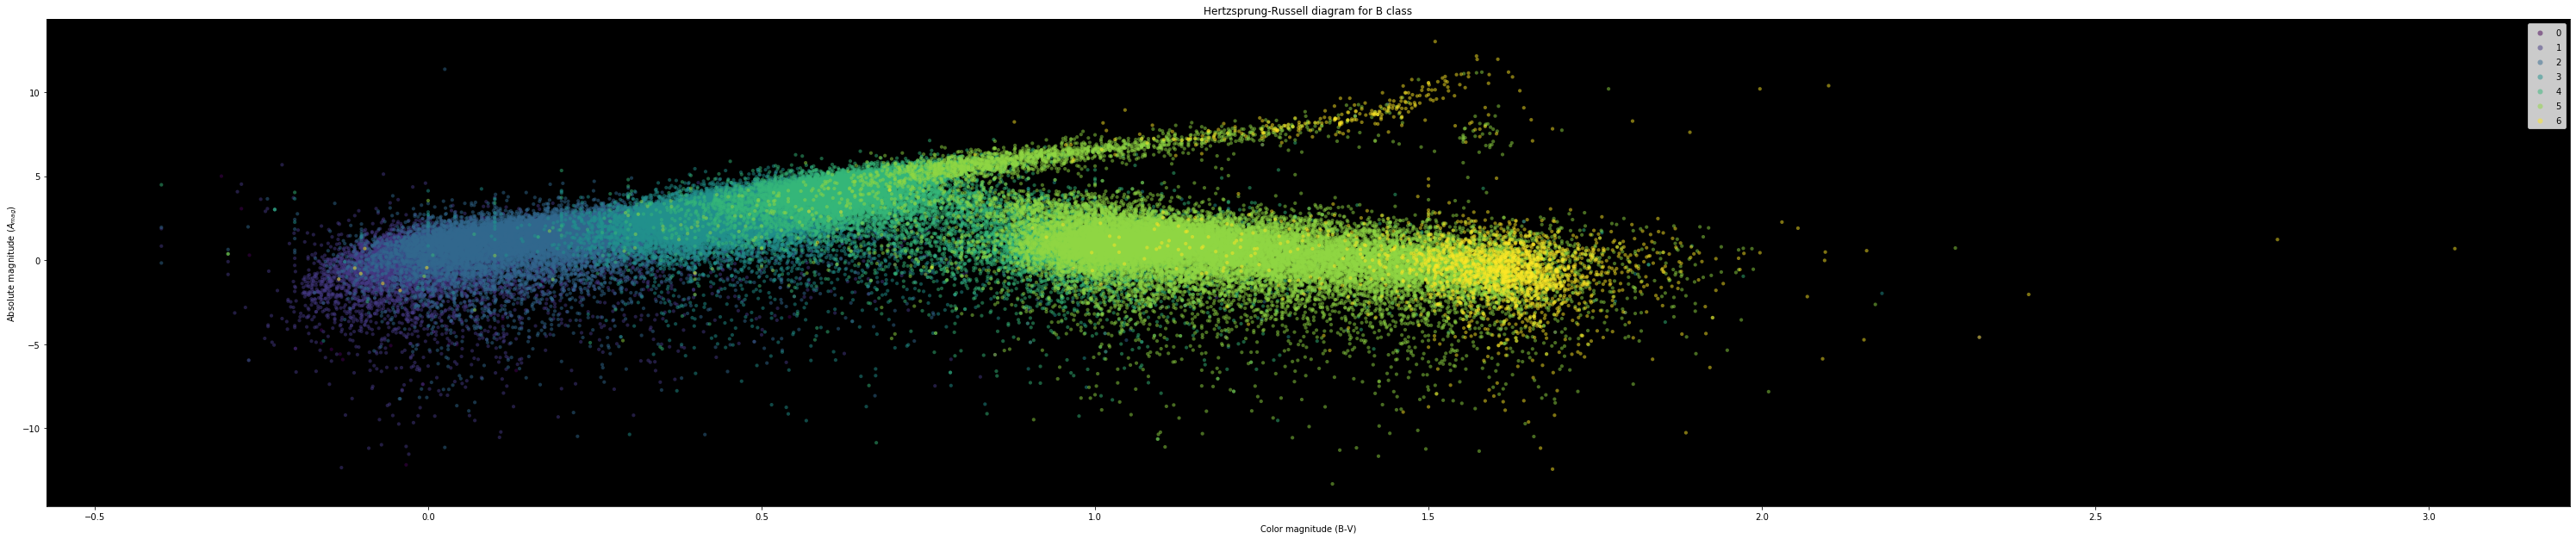

In [369]:
fig, ax = plt.subplots(figsize=(52.5,10.4))
scatter=ax.scatter(Main_new["B-V"],Main_new["Amag"], c=Main_new["SpType"], marker = '.', s = 70, linewidth = 0.01,alpha=0.5)
legend1=ax.legend(*scatter.legend_elements())
    

#ax.legend()
plt.xlabel("Color magnitude (B-V)")
plt.ylabel("Absolute magnitude ($A_{mag}$)")
plt.title("Hertzsprung-Russell diagram for B class")
#py.xlim(-4, 1.9)
#plt.ylim(5.7, -13) 

Color_BC = plt.gca()
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1)
plt.show()

In [377]:
from sklearn.preprocessing import LabelEncoder 

In [749]:
label_encoder = LabelEncoder()
Main_new['SpType'] = label_encoder.fit_transform(Main_new['SpType'])

In [750]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(Main_new, 0.2)
train_setx=np.array((train_set.drop(["SpType","e_Plx","Vmag","e_B-V","e_V-I","Temp"],1)))
train_sety=np.array(train_set["SpType"])
test_setx=np.array((test_set.drop(["SpType","e_Plx","Vmag","e_B-V","e_V-I","Temp"],1)))
test_sety=np.array(test_set["SpType"])

C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RAKESH\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [461]:
# Assuming you have your training data in X_train and corresponding labels in y_train

# Specify the classes to duplicate and their respective duplication factors
duplicate_classes = {6:24,5:10}  # Dictionary mapping class labels to duplication factors

# Initialize empty lists to store duplicated data
duplicated_X_train = []
duplicated_y_train = []

# Iterate over the original training data and labels
for x, y in zip(train_setx, train_sety):
    duplicated_X_train.append(x)
    duplicated_y_train.append(y)
    
    # Check if the current class needs duplication
    if y in duplicate_classes:
        duplication_factor = duplicate_classes[y]
        
        # Duplicate the data and labels
        for _ in range(duplication_factor - 1):
            duplicated_X_train.append(x)
            duplicated_y_train.append(y)

# Convert the duplicated data and labels to NumPy arrays
duplicated_X_train = np.array(duplicated_X_train)
duplicated_y_train = np.array(duplicated_y_train)

# Now you have duplicated_X_train and duplicated_y_train which contain the duplicated training data

# Combine the original and duplicated data if desired
train_setx = np.concatenate((train_setx, duplicated_X_train), axis=0)
train_sety = np.concatenate((train_sety, duplicated_y_train), axis=0)

# Now you can use combined_X_train and combined_y_train for training your machine learning model

In [751]:
r_forest = RandomForestClassifier()
r_forest.fit(train_setx,train_sety)
predicted = r_forest.predict(test_setx)
score = r_forest.score(test_setx, test_sety)

In [752]:
print(score)

0.7993851386708529


In [753]:
import lightgbm
from lightgbm import LGBMRegressor 
o=lightgbm.LGBMClassifier().fit(train_setx,train_sety)
acc6=o.score(test_setx,test_sety)
print(acc6)

0.8007587650444793


In [387]:
from catboost import CatBoostClassifier

In [492]:
cg_b = CatBoostClassifier()
cg_b.fit(train_setx,train_sety)
predicted = cg_b.predict(test_setx)
score5 = cg_b.score(test_setx, test_sety)


Learning rate set to 0.092891
0:	learn: 1.5964352	total: 55.8ms	remaining: 55.7s
1:	learn: 1.3848517	total: 102ms	remaining: 50.9s
2:	learn: 1.2366820	total: 148ms	remaining: 49.3s
3:	learn: 1.1214064	total: 186ms	remaining: 46.2s
4:	learn: 1.0277097	total: 212ms	remaining: 42.3s
5:	learn: 0.9517784	total: 235ms	remaining: 38.9s
6:	learn: 0.8882567	total: 255ms	remaining: 36.1s
7:	learn: 0.8333492	total: 274ms	remaining: 33.9s
8:	learn: 0.7878043	total: 293ms	remaining: 32.3s
9:	learn: 0.7479834	total: 313ms	remaining: 30.9s
10:	learn: 0.7107366	total: 332ms	remaining: 29.9s
11:	learn: 0.6767107	total: 351ms	remaining: 28.9s
12:	learn: 0.6481629	total: 370ms	remaining: 28.1s
13:	learn: 0.6233506	total: 390ms	remaining: 27.5s
14:	learn: 0.6002526	total: 411ms	remaining: 27s
15:	learn: 0.5798345	total: 430ms	remaining: 26.4s
16:	learn: 0.5611774	total: 449ms	remaining: 26s
17:	learn: 0.5444665	total: 468ms	remaining: 25.5s
18:	learn: 0.5298645	total: 487ms	remaining: 25.1s
19:	learn: 0.5

161:	learn: 0.3410754	total: 3.06s	remaining: 15.8s
162:	learn: 0.3409395	total: 3.08s	remaining: 15.8s
163:	learn: 0.3408274	total: 3.1s	remaining: 15.8s
164:	learn: 0.3407112	total: 3.11s	remaining: 15.8s
165:	learn: 0.3405174	total: 3.13s	remaining: 15.7s
166:	learn: 0.3403707	total: 3.15s	remaining: 15.7s
167:	learn: 0.3402611	total: 3.17s	remaining: 15.7s
168:	learn: 0.3401800	total: 3.19s	remaining: 15.7s
169:	learn: 0.3399827	total: 3.21s	remaining: 15.6s
170:	learn: 0.3398354	total: 3.22s	remaining: 15.6s
171:	learn: 0.3396097	total: 3.24s	remaining: 15.6s
172:	learn: 0.3394507	total: 3.26s	remaining: 15.6s
173:	learn: 0.3392346	total: 3.28s	remaining: 15.6s
174:	learn: 0.3390569	total: 3.29s	remaining: 15.5s
175:	learn: 0.3388352	total: 3.31s	remaining: 15.5s
176:	learn: 0.3387276	total: 3.33s	remaining: 15.5s
177:	learn: 0.3385426	total: 3.35s	remaining: 15.4s
178:	learn: 0.3383100	total: 3.36s	remaining: 15.4s
179:	learn: 0.3381903	total: 3.38s	remaining: 15.4s
180:	learn: 0

331:	learn: 0.3200131	total: 6.12s	remaining: 12.3s
332:	learn: 0.3199869	total: 6.15s	remaining: 12.3s
333:	learn: 0.3198568	total: 6.17s	remaining: 12.3s
334:	learn: 0.3197229	total: 6.18s	remaining: 12.3s
335:	learn: 0.3196556	total: 6.2s	remaining: 12.3s
336:	learn: 0.3195322	total: 6.21s	remaining: 12.2s
337:	learn: 0.3194581	total: 6.23s	remaining: 12.2s
338:	learn: 0.3193708	total: 6.25s	remaining: 12.2s
339:	learn: 0.3192750	total: 6.26s	remaining: 12.2s
340:	learn: 0.3191962	total: 6.28s	remaining: 12.1s
341:	learn: 0.3191113	total: 6.29s	remaining: 12.1s
342:	learn: 0.3189091	total: 6.31s	remaining: 12.1s
343:	learn: 0.3187888	total: 6.33s	remaining: 12.1s
344:	learn: 0.3187208	total: 6.35s	remaining: 12.1s
345:	learn: 0.3186511	total: 6.37s	remaining: 12s
346:	learn: 0.3185319	total: 6.38s	remaining: 12s
347:	learn: 0.3184932	total: 6.4s	remaining: 12s
348:	learn: 0.3184362	total: 6.41s	remaining: 12s
349:	learn: 0.3182991	total: 6.43s	remaining: 11.9s
350:	learn: 0.3182097	

490:	learn: 0.3071094	total: 9.03s	remaining: 9.36s
491:	learn: 0.3070556	total: 9.05s	remaining: 9.34s
492:	learn: 0.3070101	total: 9.07s	remaining: 9.32s
493:	learn: 0.3069568	total: 9.09s	remaining: 9.31s
494:	learn: 0.3068963	total: 9.1s	remaining: 9.29s
495:	learn: 0.3068048	total: 9.12s	remaining: 9.27s
496:	learn: 0.3067159	total: 9.14s	remaining: 9.25s
497:	learn: 0.3066006	total: 9.16s	remaining: 9.23s
498:	learn: 0.3065536	total: 9.18s	remaining: 9.21s
499:	learn: 0.3064948	total: 9.19s	remaining: 9.19s
500:	learn: 0.3064155	total: 9.21s	remaining: 9.17s
501:	learn: 0.3063727	total: 9.23s	remaining: 9.15s
502:	learn: 0.3063150	total: 9.25s	remaining: 9.14s
503:	learn: 0.3062060	total: 9.27s	remaining: 9.12s
504:	learn: 0.3060702	total: 9.28s	remaining: 9.1s
505:	learn: 0.3059965	total: 9.3s	remaining: 9.08s
506:	learn: 0.3058857	total: 9.31s	remaining: 9.06s
507:	learn: 0.3058335	total: 9.33s	remaining: 9.04s
508:	learn: 0.3057841	total: 9.35s	remaining: 9.02s
509:	learn: 0.3

649:	learn: 0.2964867	total: 11.9s	remaining: 6.38s
650:	learn: 0.2964384	total: 11.9s	remaining: 6.37s
651:	learn: 0.2963862	total: 11.9s	remaining: 6.35s
652:	learn: 0.2963705	total: 11.9s	remaining: 6.33s
653:	learn: 0.2963260	total: 11.9s	remaining: 6.31s
654:	learn: 0.2963062	total: 11.9s	remaining: 6.29s
655:	learn: 0.2962476	total: 12s	remaining: 6.28s
656:	learn: 0.2961570	total: 12s	remaining: 6.27s
657:	learn: 0.2961234	total: 12s	remaining: 6.26s
658:	learn: 0.2960951	total: 12.1s	remaining: 6.24s
659:	learn: 0.2960454	total: 12.1s	remaining: 6.23s
660:	learn: 0.2959889	total: 12.1s	remaining: 6.21s
661:	learn: 0.2958706	total: 12.1s	remaining: 6.19s
662:	learn: 0.2958037	total: 12.2s	remaining: 6.18s
663:	learn: 0.2957454	total: 12.2s	remaining: 6.16s
664:	learn: 0.2956908	total: 12.2s	remaining: 6.14s
665:	learn: 0.2956341	total: 12.2s	remaining: 6.12s
666:	learn: 0.2955264	total: 12.2s	remaining: 6.1s
667:	learn: 0.2954615	total: 12.2s	remaining: 6.08s
668:	learn: 0.29540

815:	learn: 0.2866140	total: 15.1s	remaining: 3.4s
816:	learn: 0.2865641	total: 15.1s	remaining: 3.38s
817:	learn: 0.2865036	total: 15.1s	remaining: 3.36s
818:	learn: 0.2864511	total: 15.1s	remaining: 3.34s
819:	learn: 0.2863874	total: 15.2s	remaining: 3.33s
820:	learn: 0.2863593	total: 15.2s	remaining: 3.31s
821:	learn: 0.2863079	total: 15.2s	remaining: 3.29s
822:	learn: 0.2862075	total: 15.2s	remaining: 3.27s
823:	learn: 0.2861548	total: 15.2s	remaining: 3.26s
824:	learn: 0.2860976	total: 15.3s	remaining: 3.24s
825:	learn: 0.2860326	total: 15.3s	remaining: 3.22s
826:	learn: 0.2859502	total: 15.3s	remaining: 3.2s
827:	learn: 0.2858764	total: 15.3s	remaining: 3.19s
828:	learn: 0.2858346	total: 15.4s	remaining: 3.17s
829:	learn: 0.2857857	total: 15.4s	remaining: 3.15s
830:	learn: 0.2857224	total: 15.4s	remaining: 3.13s
831:	learn: 0.2856475	total: 15.4s	remaining: 3.12s
832:	learn: 0.2855780	total: 15.5s	remaining: 3.1s
833:	learn: 0.2854876	total: 15.5s	remaining: 3.08s
834:	learn: 0.2

975:	learn: 0.2783132	total: 18.3s	remaining: 451ms
976:	learn: 0.2782569	total: 18.3s	remaining: 432ms
977:	learn: 0.2781890	total: 18.4s	remaining: 413ms
978:	learn: 0.2781154	total: 18.4s	remaining: 394ms
979:	learn: 0.2780275	total: 18.4s	remaining: 376ms
980:	learn: 0.2779898	total: 18.4s	remaining: 357ms
981:	learn: 0.2779575	total: 18.4s	remaining: 338ms
982:	learn: 0.2778885	total: 18.5s	remaining: 319ms
983:	learn: 0.2778183	total: 18.5s	remaining: 301ms
984:	learn: 0.2777838	total: 18.5s	remaining: 282ms
985:	learn: 0.2777237	total: 18.5s	remaining: 263ms
986:	learn: 0.2776999	total: 18.5s	remaining: 244ms
987:	learn: 0.2776408	total: 18.6s	remaining: 226ms
988:	learn: 0.2775927	total: 18.6s	remaining: 207ms
989:	learn: 0.2775667	total: 18.6s	remaining: 188ms
990:	learn: 0.2775154	total: 18.6s	remaining: 169ms
991:	learn: 0.2774647	total: 18.6s	remaining: 150ms
992:	learn: 0.2774211	total: 18.7s	remaining: 132ms
993:	learn: 0.2773823	total: 18.7s	remaining: 113ms
994:	learn: 

In [493]:
print(score5)

0.8623125969326211


In [404]:
import seaborn as sns

[Text(0, 0.5, 'Vmag'),
 Text(0, 1.5, 'Plx'),
 Text(0, 2.5, 'e_Plx'),
 Text(0, 3.5, 'B-V'),
 Text(0, 4.5, 'e_B-V'),
 Text(0, 5.5, 'V-I'),
 Text(0, 6.5, 'e_V-I'),
 Text(0, 7.5, '(V-I)red'),
 Text(0, 8.5, 'SpType'),
 Text(0, 9.5, 'Amag'),
 Text(0, 10.5, 'Temp')]

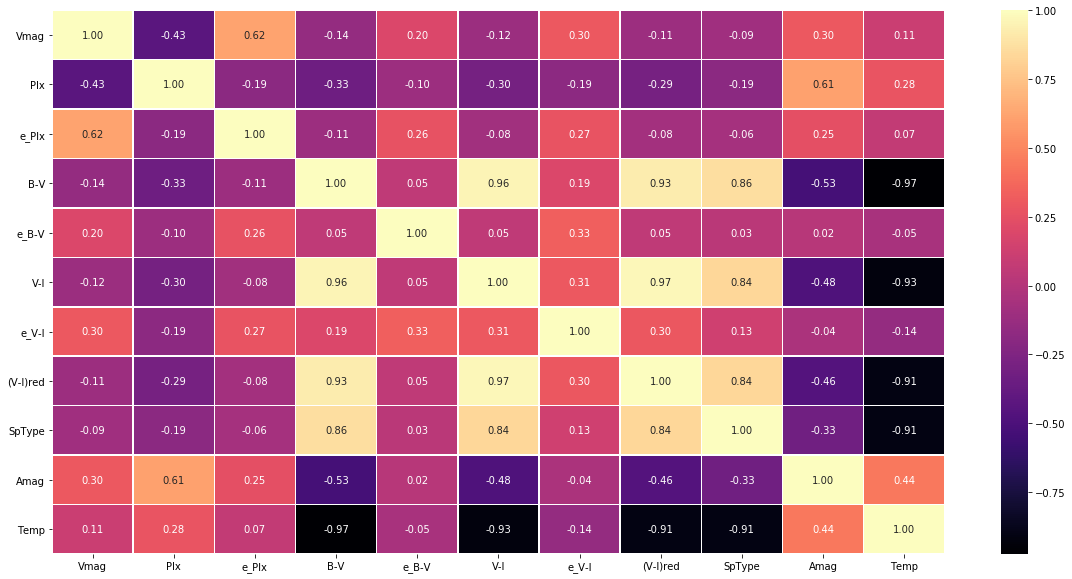

In [406]:
plt.subplots(figsize=(20,10))
data=sns.heatmap(Main_new.corr(),annot=True,cmap='magma',fmt='0.2f' ,linewidth=0.5)
data.set_yticklabels(data.get_yticklabels(),rotation=0,horizontalalignment="right")

In [760]:
pattern = re.compile(r'B\d[I]')

# Filter rows based on the pattern in the 'Sptype' column
B_giant = df3[df3['SpType'].str.contains(pattern)]


In [761]:
B_giant

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
92,6.25,2.45,0.69,-0.042,0.005,-0.02,0.01,-0.01,B9IIIp Mn,-1.804170,10681.296989
203,4.55,14.31,0.92,-0.047,0.003,-0.03,0.02,-0.03,B9IVn,0.328198,10752.091303
405,7.39,2.53,0.57,-0.018,0.003,0.00,0.00,0.00,B9IV,-0.594397,10355.461805
620,7.09,2.16,0.77,0.137,0.009,0.15,0.01,0.11,B5II: SB,-1.237731,8685.001625
1218,6.55,5.13,0.83,-0.060,0.002,-0.04,0.00,-0.04,B9IV,0.100587,10941.168528
...,...,...,...,...,...,...,...,...,...,...,...
72301,5.25,2.34,0.62,-0.137,0.008,-0.13,0.01,-0.13,B2IIIv SB,-2.903921,12235.059680
72355,7.44,4.35,0.91,-0.042,0.002,-0.02,0.00,-0.02,B9IV,0.632446,10681.296989
73449,6.51,4.51,0.82,-0.079,0.005,-0.06,0.01,-0.07,B9III He wk,-0.219117,11231.323162
73781,6.75,1.54,0.73,-0.043,0.005,-0.02,0.01,-0.01,B3IV SB:,-2.312396,10695.372425


In [766]:
pattern = re.compile(r'B\d[I]')

# Filter rows based on the pattern in the 'Sptype' column
B_mainseq = df3[df3['SpType'].str.contains(pattern)]


In [767]:
B_mainseq

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
92,6.25,2.45,0.69,-0.042,0.005,-0.02,0.01,-0.01,B9IIIp Mn,-1.804170,10681.296989
107,8.68,2.07,0.80,-0.052,0.006,-0.03,0.01,-0.03,B9V,0.259852,10823.943145
120,5.04,6.40,0.87,-0.150,0.042,-0.14,0.02,-0.14,B4V,-0.929100,12488.510846
203,4.55,14.31,0.92,-0.047,0.003,-0.03,0.02,-0.03,B9IVn,0.328198,10752.091303
218,7.09,4.24,0.92,-0.085,0.004,-0.07,0.02,-0.07,B8V,0.226829,11326.572460
...,...,...,...,...,...,...,...,...,...,...,...
74817,9.23,2.18,1.11,0.039,0.016,0.05,0.01,0.02,B9V,0.922282,9663.430837
75500,4.49,21.16,0.87,-0.032,0.004,-0.04,0.02,-0.04,B9V,1.117578,10542.784680
75576,5.24,9.84,0.87,-0.084,0.003,-0.06,0.00,-0.06,B9V,0.204975,11310.572070
75845,7.74,0.87,0.68,0.001,0.011,0.02,0.01,0.01,B2Vn(e),-2.562404,10112.780571


In [773]:
p_8=B_mainseq[(B_mainseq["SpType"]=="BVI")]

In [780]:
p_8

,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,(V-I)red,SpType,Amag,Temp
8197,9.94,11.23,1.85,0.673,0.004,0.73,0.00,0.73,DF,5.191899,5695.668906
9261,6.50,9.39,0.92,0.294,0.003,0.34,0.00,0.34,DAn...,1.363328,7500.209881
11740,11.39,98.50,1.46,0.025,0.035,-0.23,0.02,-0.23,DA,11.357181,9823.727828
14296,9.46,21.37,1.62,0.782,0.039,0.82,0.03,0.69,K0Vea + DA,6.109023,5335.537447
15573,9.22,2.48,0.73,0.398,0.015,0.46,0.02,0.46,Fm delta Del,1.192258,6890.909742
22444,5.89,9.24,0.97,0.223,0.004,0.25,0.01,0.25,A5me del Del,0.718360,7989.171797
40197,7.55,6.14,1.06,0.437,0.008,0.51,0.01,0.48,Fm delta Del,1.490842,6689.152681
45986,6.90,6.72,0.87,0.370,0.015,0.43,0.02,0.43,Fm delta Del,1.036846,7044.130880
78001,10.32,9.11,1.95,-0.067,0.066,-0.04,0.07,0.13,DB:p,5.117592,11046.098228
79027,8.01,5.29,0.87,0.541,0.012,0.61,0.01,0.64,Fm delta Del,1.627278,6208.599163
